# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### TRAN-NGOC Linh - __[Linh.Tran-Ngoc@ulb.be](mailto:Linh.Tran-Ngoc@ulb.be) - Student ID 459764__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [1]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

The dataset on which we will have to establush predictions for the DrivenData is also loaded.

In [2]:
eval_data <- read.csv("test_set_values.csv",stringsAsFactors = T)

## Data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

The X dataset contains 59400 samples with 40 different features, of which 30 are categorical and 10 are numerical.

In [3]:
options(repr.matrix.max.cols=100)
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55657   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [4]:
categorical_variables <- which(sapply(X[1,],class)=="factor")
length(categorical_variables)

[1] 30

The target variable is a categorical variable with 3 different levels, indicating if the water pump is functional, functional but needs repair or non functional.

In [5]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55657                                  
 Max.   :74247                                  

This histogram shows the number of samples corresponding to each class of the target variable. Notice that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category $functional\ needs\ repair$, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

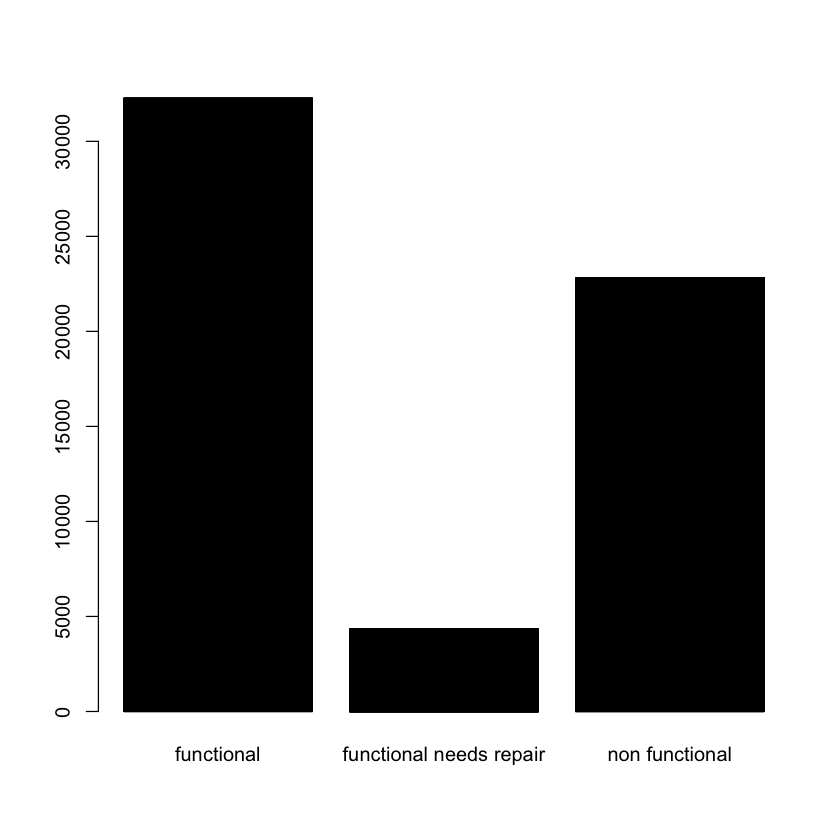

In [5]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y))

# Data preprocessing

## Missing value imputation


### Categorical variables

We check if there are any NA values in the dataset. The results show that no NA values are present in either dataset.

In [8]:
sum(is.na(X))
sum(is.na(Y))

[1] 0

[1] 0

It is however important to note that this result does not look for empty strings or $none$ strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were wome empty strings, for example for features $funder$, $installer$, $subvillage$, $scheme\_management$,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

In [9]:
data <- merge(X,Y)
dim(data)
head(data)
demo_data <- data

[1] 59400    41

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


We start by representing the number of missing values for each categorical variable (and the percentage it corresponds to in regard to the total number of samples). The missing values will be treated in several different ways :
- removing features containing too many missing values
- removing the samples with the missing values
- considering the missing values as a category on their own
- keeping only the relevant classes of the problematic features through one hot encoding (for example discard the column resulting from the none class in the one hot encoding but keeping the rest)

In [10]:
empty_count <- c()
for (c in colnames(demo_data[,categorical_variables])) { 
    a <- dim(demo_data[demo_data[,c] == "none" | demo_data[,c] == "" | demo_data[,c] == "None",])[1]
    empty_count <- c(empty_count,a)
}

df <- data.frame(variable=colnames(demo_data[,categorical_variables]),empty_count=empty_count,percentage=100*empty_count/nrow(demo_data))
df[df$empty_count != 0,]

,variable,empty_count,percentage
,<chr>,<int>,<dbl>
2,funder,3637,6.1228956
3,installer,3655,6.1531987
4,wpt_name,3565,6.0016835
6,subvillage,371,0.6245791
10,public_meeting,3334,5.6127946
12,scheme_management,3878,6.5286195
13,scheme_name,28835,48.5437710
14,permit,3056,5.1447811


It stands out that the feature $scheme\_name$ has more than 47% of missing values. We first analyze if any of the other classes of this feature could be interesting to keep (if there are there any dominant classes that affect a large number of samples that might bring some information). A barplot displays the 5 most common classes of this feature and shows the number of corresponding samples. We see that the other classes really represent extremely small amounts of samples (less than 1000), and that the missing values are too present to consider this feature as informative, it is therefore removed from the dataset.

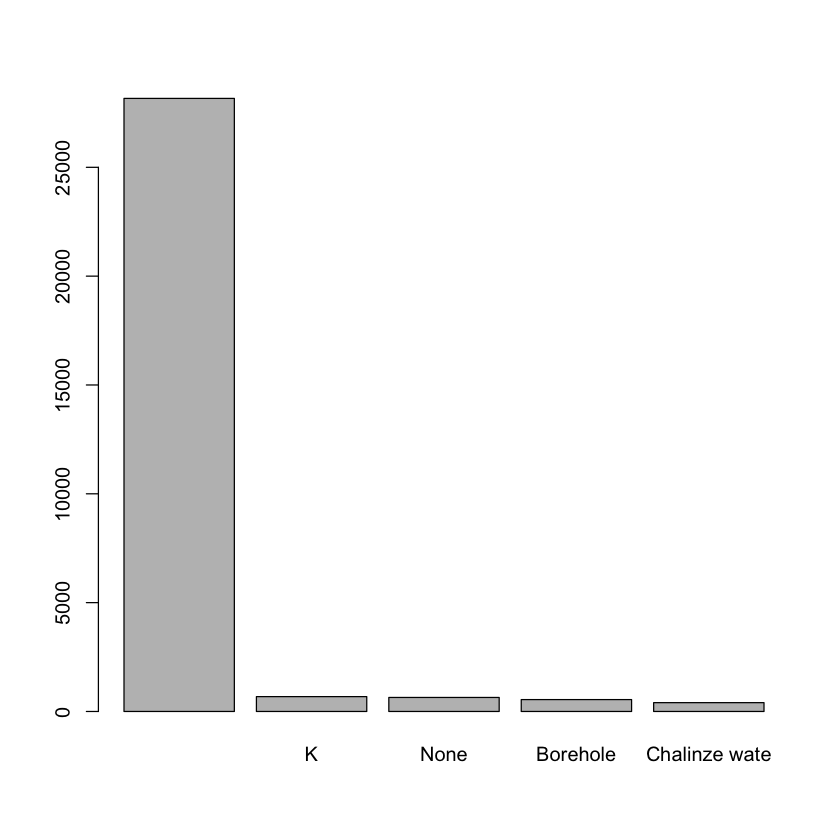

In [11]:
barplot((sort(table(demo_data$scheme_name), decreasing=TRUE)[1:5] ))

In [11]:
remove_scheme_name <- function(df) {
    return(subset(df,select=-c(scheme_name)))
}

In [13]:
demo_data <- remove_scheme_name(demo_data)

The rest of the categorical features containing a lot of missing values will be treated throughout the preprocessing, using the various methods that were listed previously.

### Numerical variables

In [14]:
numerical_variables <- which(sapply(X[1,],class)=="integer" | sapply(X[1,],class)=="numeric")
length(numerical_variables)
colnames(data)[numerical_variables]

[1] 10

[1] "id"                "amount_tsh"        "gps_height"       
 [4] "longitude"         "latitude"          "num_private"      
 [7] "region_code"       "district_code"     "population"       
[10] "construction_year"

Concerning the numerical variables, it is sometimes tricky to know whether 0s correspond to missing values or not. For the $longitude$ and $latitude$ features, we can plot the data graphically :

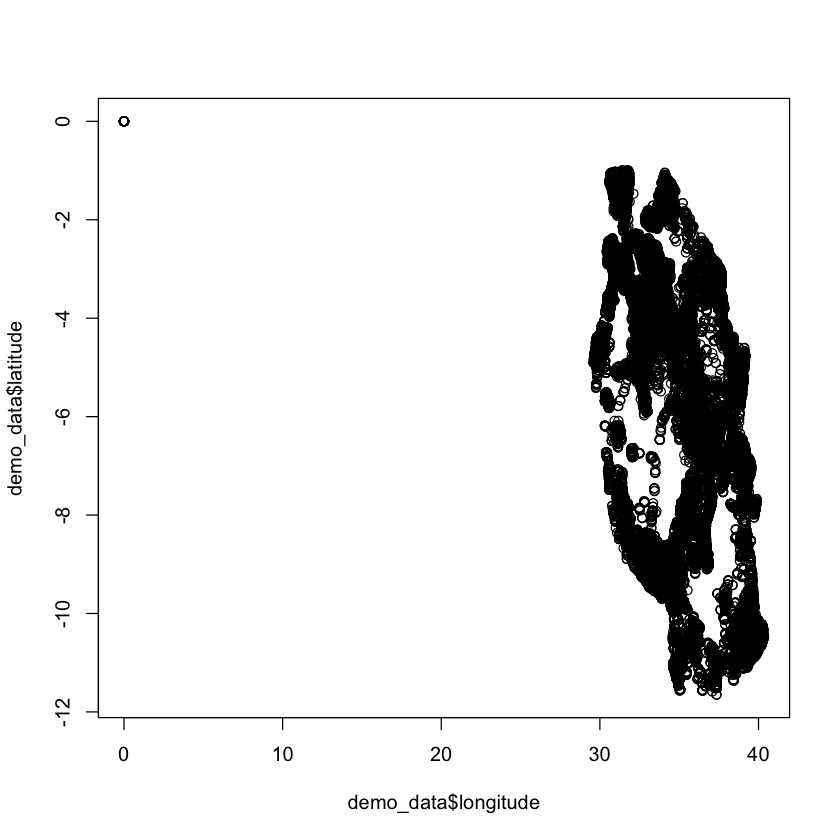

In [15]:
plot(demo_data$longitude,demo_data$latitude)

We see some outliers that have coordinates (0,0), which we will replace by the mean values of the coordinates.

In [12]:
discard_unrealistic_coordinates <- function(df) {
    df$longitude[df$longitude < 20] <- mean(df$longitude)
    df$latitude[df$longitude < 20] <- mean(df$latitude)
    return(df)
}

In [18]:
demo_data <- discard_unrealistic_coordinates(demo_data)

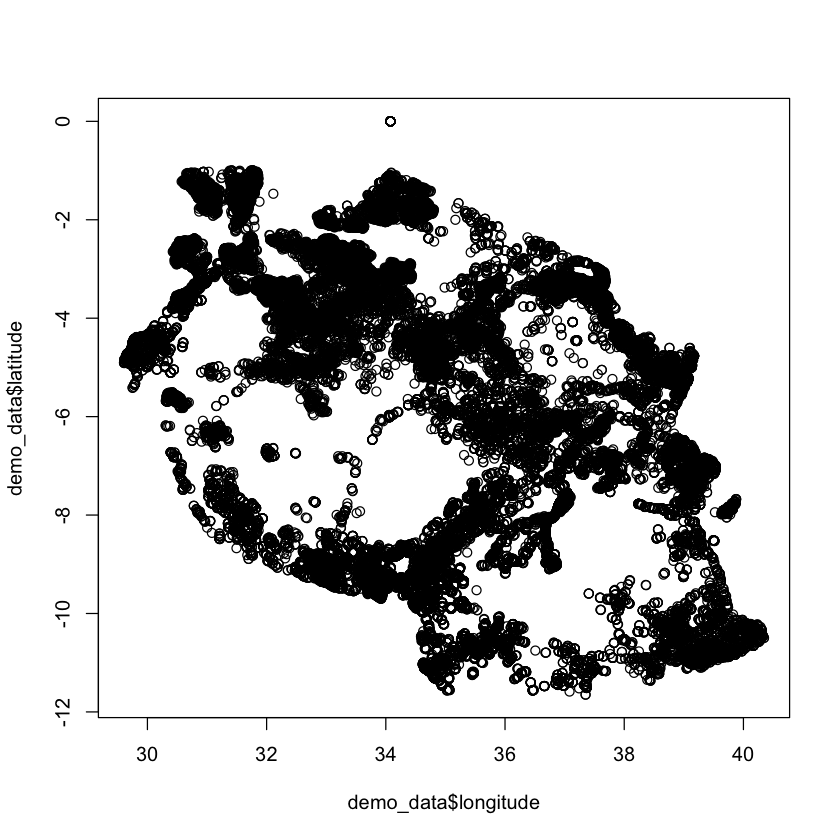

In [19]:
plot(demo_data$longitude,demo_data$latitude)

Concerning the $construction\_year$ feature, it is equal to 0 for 35\% of the samples. In this particular case, replacing the values by the mean value of the feature does not seem logical, and deleting 35\% of the dataset because of this particular feature is not an option either. Therefore, we chose to divide the construction years into groups of 10 years, use it as a categorical variable with one-hot encoding and discard the one-hot encoded feature corresponding to the 0-year.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0    1986    1301    2004    2013 

[1] 20709

[1] 34.86364

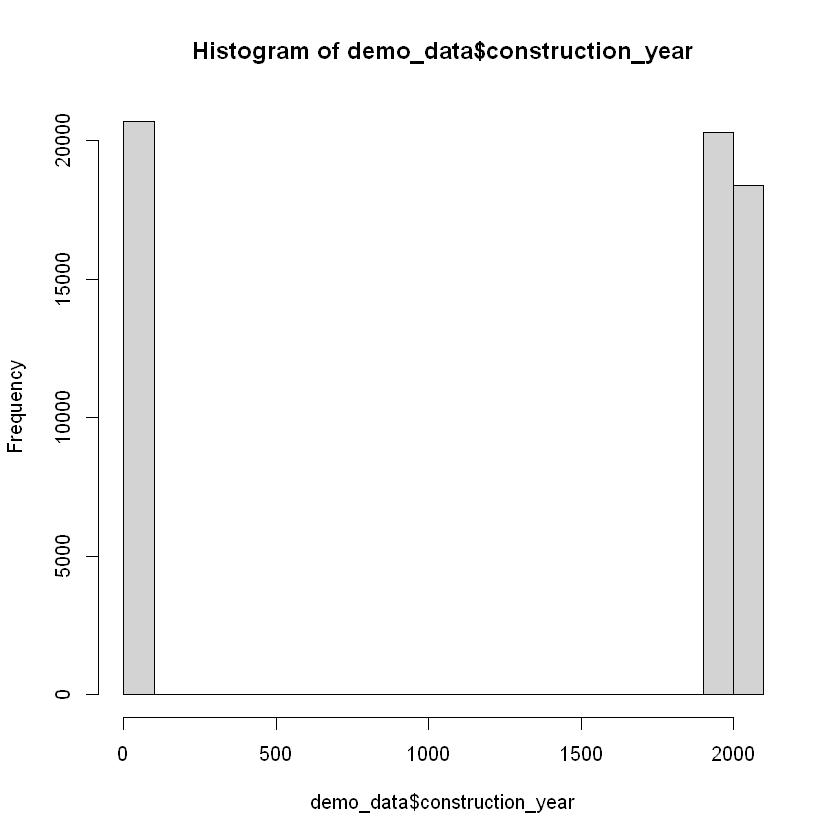

In [13]:
summary(demo_data$construction_year)
dim(demo_data[demo_data$construction_year == 0,])[1]
100*dim(demo_data[demo_data$construction_year == 0,])[1]/nrow(demo_data)
hist(demo_data$construction_year)

In [14]:
nlevels(as.factor(demo_data$construction_year))

[1] 55

In [49]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns




In [50]:
one_hot_construction_year <- function(df) {
    df$construction_year[df$construction_year > 1959 & df$construction_year < 1970] = "1960s"
    df$construction_year[df$construction_year > 1969 & df$construction_year < 1980] = "1970s"
    df$construction_year[df$construction_year > 1979 & df$construction_year < 1990] = "1980s"
    df$construction_year[df$construction_year > 1989 & df$construction_year < 2000] = "1990s"
    df$construction_year[df$construction_year > 1999 & df$construction_year < 2010] = "2000s"
    df$construction_year[df$construction_year > 2009 & df$construction_year < 2020] = "2010s"
    df$construction_year <- as.factor(df$construction_year)
    dum <- dummy.data.frame(df,names=c("construction_year"), sep="_")
    df <- subset(dum,select=-c(construction_year_0))

    return(df)
}

In [126]:
demo_data <- one_hot_construction_year(demo_data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


In [127]:
summary(demo_data)

   amount_tsh          date_recorded                      funder     
 Min.   :     0.0   2011-03-15:  572   Government Of Tanzania: 9084  
 1st Qu.:     0.0   2011-03-17:  558                         : 3635  
 Median :     0.0   2013-02-03:  546   Danida                : 3114  
 Mean   :   317.7   2011-03-14:  520   Hesawa                : 2202  
 3rd Qu.:    20.0   2011-03-16:  513   Rwssp                 : 1374  
 Max.   :350000.0   2011-03-18:  497   World Bank            : 1349  
                    (Other)   :56194   (Other)               :38642  
   gps_height          installer       longitude        latitude      
 Min.   : -90.0   DWE       :17402   Min.   : 0.00   Min.   :-11.649  
 1st Qu.:   0.0             : 3655   1st Qu.:33.09   1st Qu.: -8.541  
 Median : 369.0   Government: 1825   Median :34.91   Median : -5.022  
 Mean   : 668.3   RWE       : 1206   Mean   :34.08   Mean   : -5.706  
 3rd Qu.:1319.2   Commu     : 1060   3rd Qu.:37.18   3rd Qu.: -3.326  
 Max.   :2770.

## Handle categorical variables

All the categorical variables present in the merged dataset are presented below.

In [25]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature $recorded\_by$ contains only 1 factor, which is $GeoData Consultants Ltd$.

In [16]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


In [17]:
remove_useless_features <- function(df) {
    df <- subset(df,select=-c(recorded_by))
    return(df)
}

In [28]:
demo_data <- remove_useless_features(demo_data)

In [29]:
dim(demo_data)

[1] 59400    44

## Boolean features

By analyzing the features that contain 3 classes, we see that some of them are boolean features ($public\_meeting$ and $permit$), which take the values True, False or an empty string. There is also a feature $source\_class$ that contains only 2 classes and an $unknown$ class. By analyzing the distribution of the different classes of these features, we can see that the missing values are always very minoritary, we could therefore remove the problematic samples and encode these features as boolean 0-1 features.

[1] "public_meeting"
[1] 
Levels:  False True
[1] "permit"
[1] True
Levels:  False True


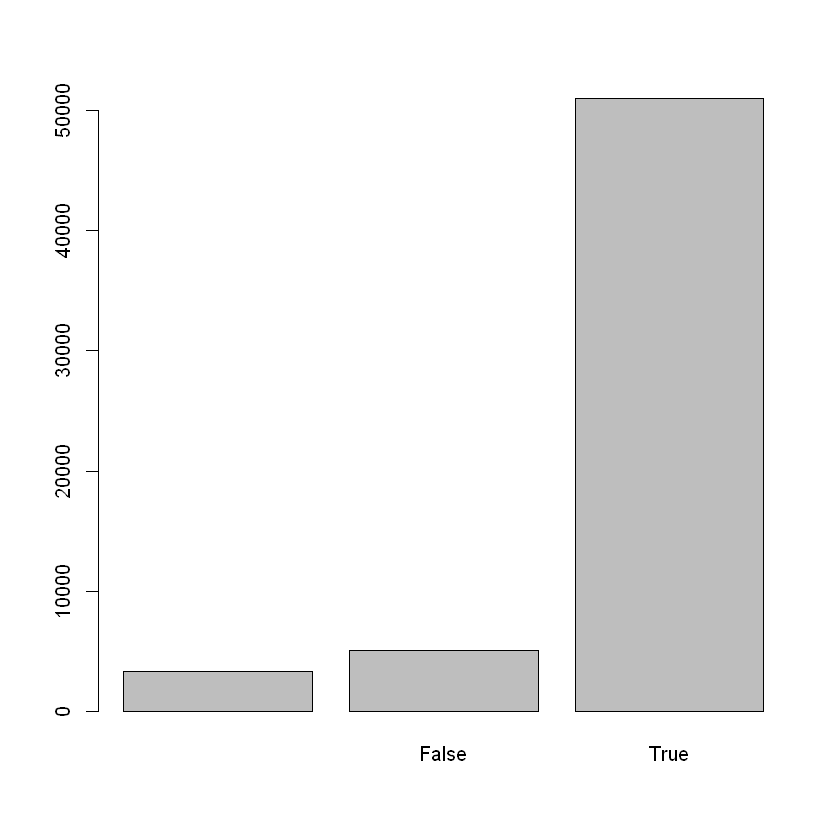

[1] "source_class"
[1] groundwater
Levels: groundwater surface unknown


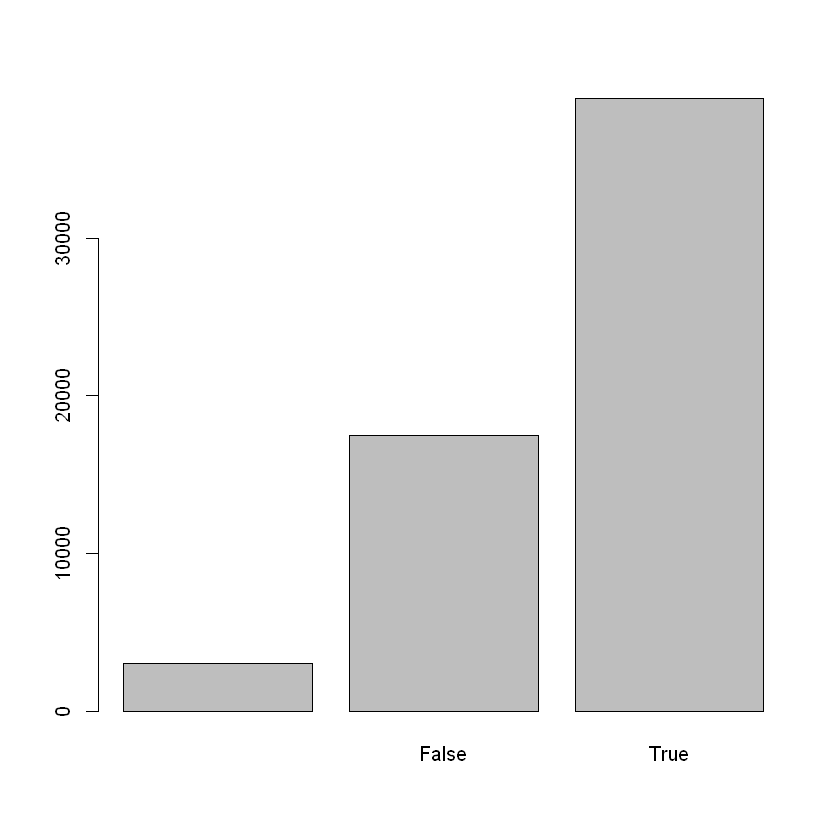

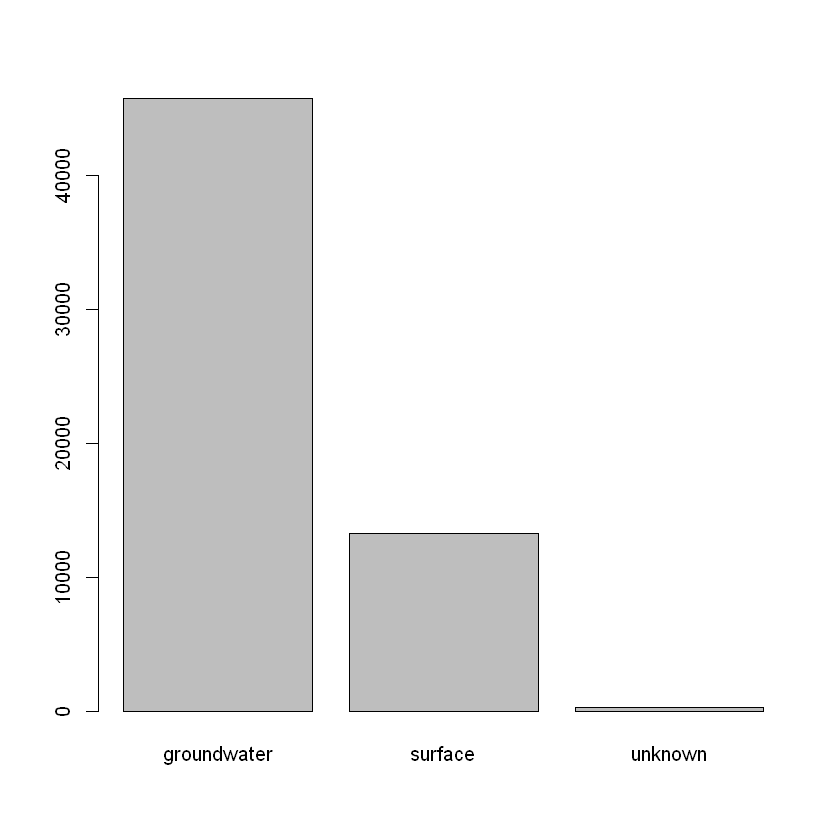

In [19]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l == 3) {
        print(n)
        print(data[1,n])
        barplot(table(data[,n]))
    }
}

In [20]:
create_binary_features_training <- function(df) {
    df <- df[df$public_meeting != "", ] 
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    df <- df[df$permit != "", ] 
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    df <- df[df$source_class != "unknown", ] 
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

In [21]:
create_binary_features_test <- function(df) {
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

In [32]:
demo_data <- create_binary_features(demo_data)

### Convert the dates

The feature $date\_recorded$ is a categorical variable but can easily be converted into a numerical one. To avoid having unnecessarily large values, the minimal date is substracted.

In [22]:
convert_date_to_numeric <- function(df) {
    df$date_recorded <- as.numeric(as.Date(df$date_recorded))
    df$date_recorded <- df$date_recorded - min(df$date_recorded)
    return(df)
}

In [34]:
demo_data <- convert_date_to_numeric(demo_data)

In [35]:
min(demo_data$date_recorded)

[1] 0

In [36]:
head(demo_data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>
2,1,0,3064,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,1,,0,0,0,0,0,1,0,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,1,hand pump,hand pump,functional
3,2,0,3086,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,1,VWC,1,0,0,0,0,0,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,1,communal standpipe multiple,communal standpipe,functional
4,3,10,3885,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,1,Water Board,1,0,0,0,1,0,0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,1,communal standpipe,communal standpipe,functional
5,4,0,3081,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,1,VWC,1,0,0,0,0,0,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,1,hand pump,hand pump,non functional
6,5,50,3057,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1,Private operator,0,0,0,0,0,0,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,1,communal standpipe multiple,communal standpipe,functional
7,6,0,3659,Government Of Tanzania,0,Government,33.22988,-3.852983,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,1,VWC,1,0,0,0,0,0,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,1,other,other,non functional


### Handpicking redundant features

Some features are noticeably redudant at first sight, and we can therefore reduce the number of features.

In [37]:
table(data$extraction_type)
table(data$extraction_type_group)
table(data$extraction_type_class)


                  afridev                      cemo                    climax 
                     1770                        90                        32 
                  gravity             india mark ii            india mark iii 
                    26780                      2400                        98 
                      ksb                      mono               nira/tanira 
                     1415                      2865                      8154 
                    other other - mkulima/shinyanga         other - play pump 
                     6430                         2                        85 
        other - rope pump            other - swn 81               submersible 
                      451                       229                      4764 
                   swn 80                    walimi                  windmill 
                     3670                        48                       117 


        afridev         gravity   india mark ii  india mark iii            mono 
           1770           26780            2400              98            2865 
    nira/tanira           other  other handpump other motorpump       rope pump 
           8154            6430             364             122             451 
    submersible          swn 80    wind-powered 
           6179            3670             117 


     gravity     handpump    motorpump        other    rope pump  submersible 
       26780        16456         2987         6430          451         6179 
wind-powered 
         117 

In [11]:
table(data$management)
table(data$scheme_management)


         company            other   other - school       parastatal 
             685              844               99             1768 
private operator            trust          unknown              vwc 
            1971               78              561            40507 
 water authority      water board              wua              wug 
             904             2933             2535             6515 


                          Company             None            Other 
            3877             1061                1              766 
      Parastatal Private operator              SWC            Trust 
            1680             1063               97               72 
             VWC              WUA              WUG      Water Board 
           36793             2883             5206             2748 
 Water authority 
            3153 

In [19]:
table(data$waterpoint_type)
table(data$waterpoint_type_group)


              cattle trough          communal standpipe 
                        116                       28522 
communal standpipe multiple                         dam 
                       6103                           7 
                  hand pump             improved spring 
                      17488                         784 
                      other 
                       6380 


     cattle trough communal standpipe                dam          hand pump 
               116              34625                  7              17488 
   improved spring              other 
               784               6380 

In [20]:
table(data$source)
table(data$source_type)


                 dam             hand dtw                 lake 
                 656                  874                  765 
         machine dbh                other rainwater harvesting 
               11075                  212                 2295 
               river         shallow well               spring 
                9612                16824                17021 
             unknown 
                  66 


            borehole                  dam                other 
               11949                  656                  278 
rainwater harvesting           river/lake         shallow well 
                2295                10377                16824 
              spring 
               17021 

In [21]:
table(data$quantity)
table(data$quantity_group)


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 

In [22]:
table(data$water_quality)
table(data$quality_group)


          coloured           fluoride fluoride abandoned              milky 
               490                200                 17                804 
             salty    salty abandoned               soft            unknown 
              4856                339              50818               1876 


 colored fluoride     good    milky    salty  unknown 
     490      217    50818      804     5195     1876 

In [25]:
table(data$payment)
table(data$payment_type)


            never pay                 other          pay annually 
                25348                  1054                  3642 
          pay monthly        pay per bucket pay when scheme fails 
                 8300                  8985                  3914 
              unknown 
                 8157 


  annually    monthly  never pay on failure      other per bucket    unknown 
      3642       8300      25348       3914       1054       8985       8157 

In [23]:
remove_redundant_features <- function(df) {
    df <- subset(df,select=-c(extraction_type,scheme_management,waterpoint_type_group,source_type,quantity_group,quality_group,payment))
    return(df)
}

### Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [24]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 1000) {
        print(n)
        problematic_features <- c(problematic_features,n)
        print(data[1,n])
    }
}
problematic_features

[1] "funder"
[1] Tasaf
1898 Levels:  0 A/co Germany Aar Abas Ka Abasia ... Zingibali Secondary
[1] "installer"
[1] TASAF
2146 Levels:  - 0 A.D.B AAR Aartisa ABASIA ABD ABDALA ... Zuber Mihungo
[1] "wpt_name"
[1] Mratibu
37400 Levels: 24 A Kulwa A Saidi Abass Abbas Abdala Hamisi ... Zuwena Kindo
[1] "subvillage"
[1] Majengo
19288 Levels:  'A' Kati ## 1 14Kambalage 18 19 20 22B 23B 24 24B 30 42 43 ... Zuri
[1] "ward"
[1] Igalula
2092 Levels: Aghondi Akheri Arash Arri Arusha Chini Babayu Badi Badugu ... Zuzu
[1] "scheme_name"
[1] 
2697 Levels:  14 Kambarage A ADP ADP Simbo ADP Simbu Adra ... Zuzu


[1] "funder"      "installer"   "wpt_name"    "subvillage"  "ward"       
[6] "scheme_name"

For each one of these features, we check the distribution of the different categories.

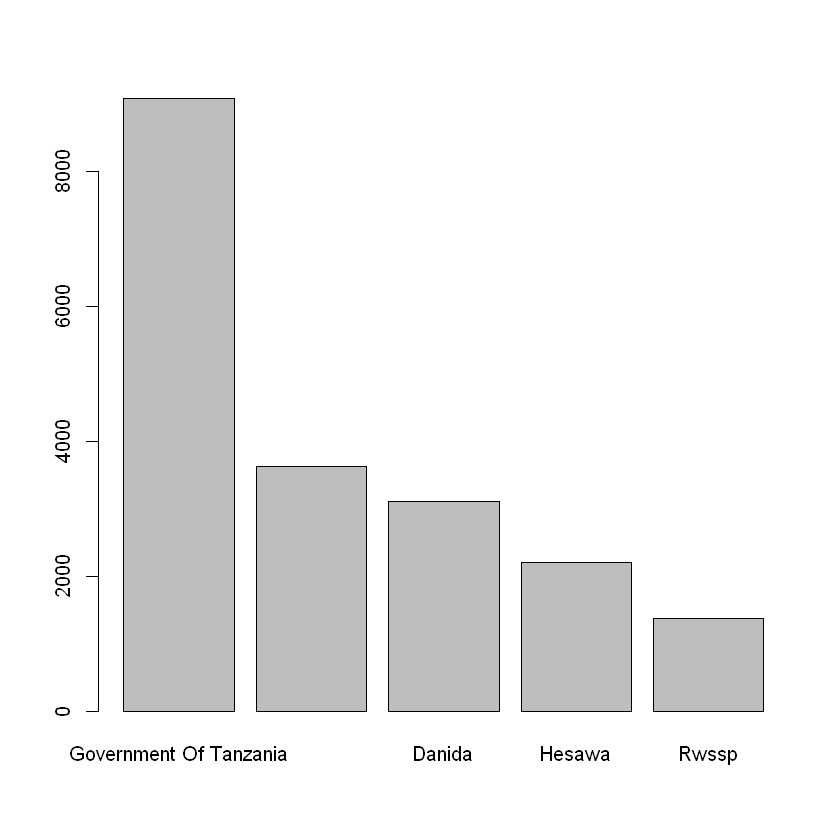

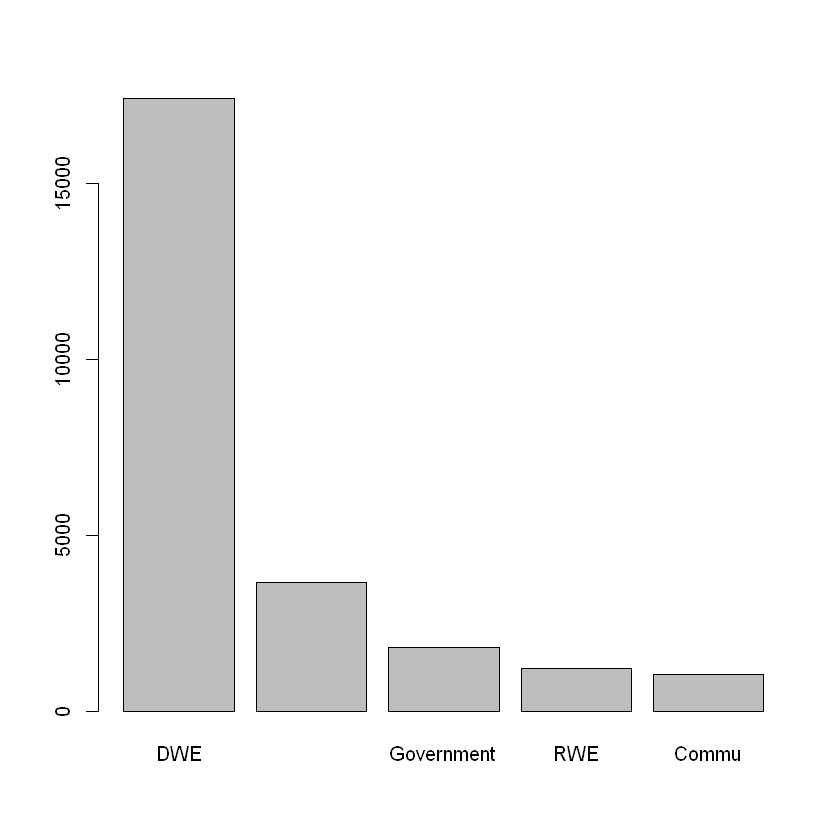

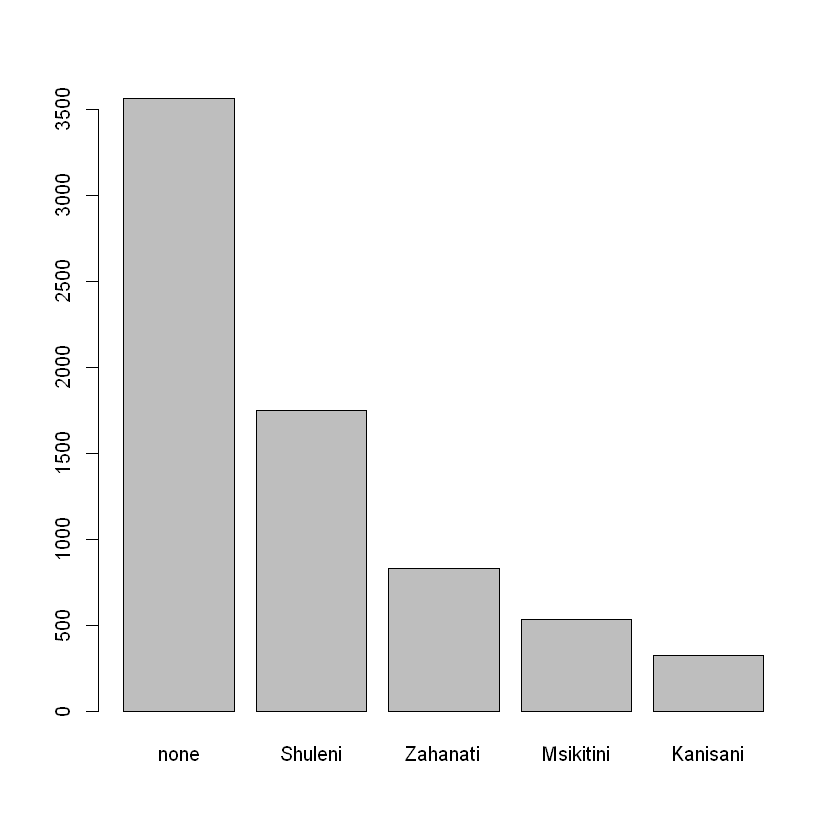

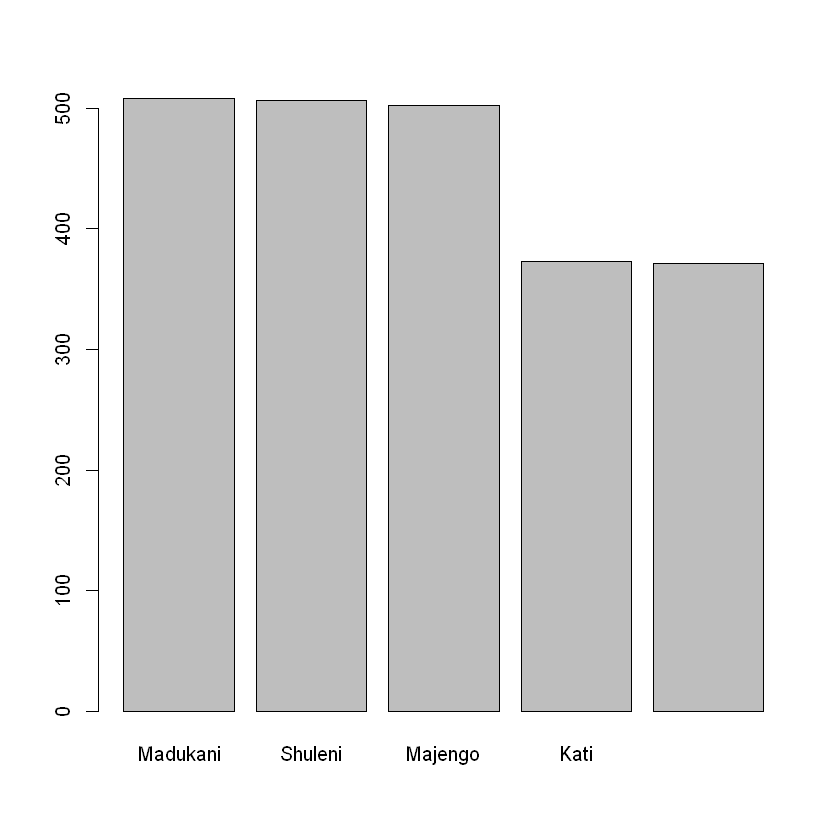

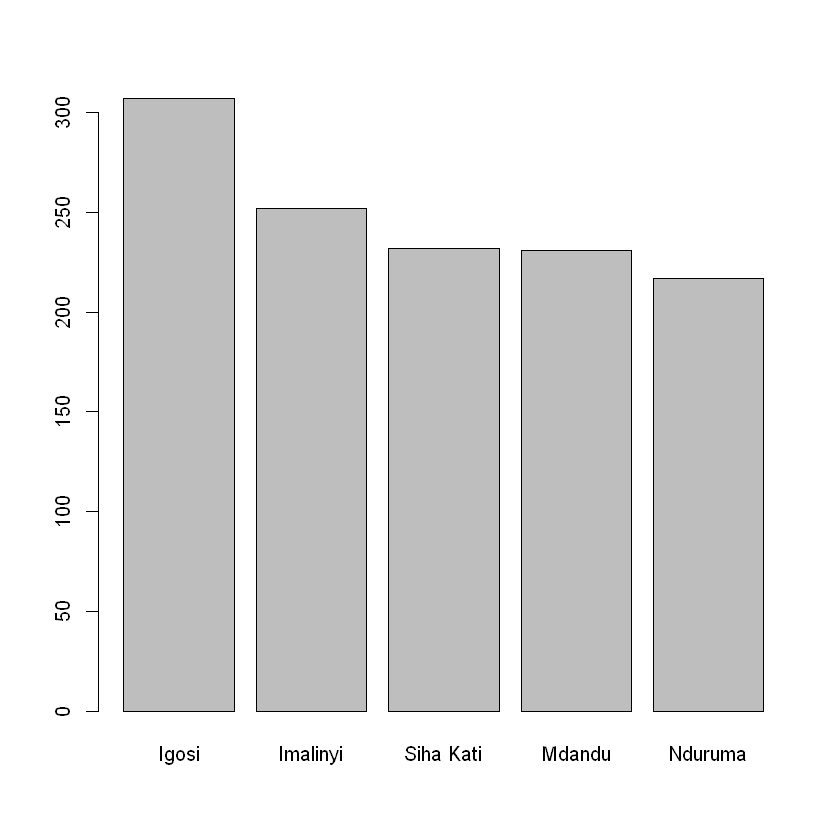

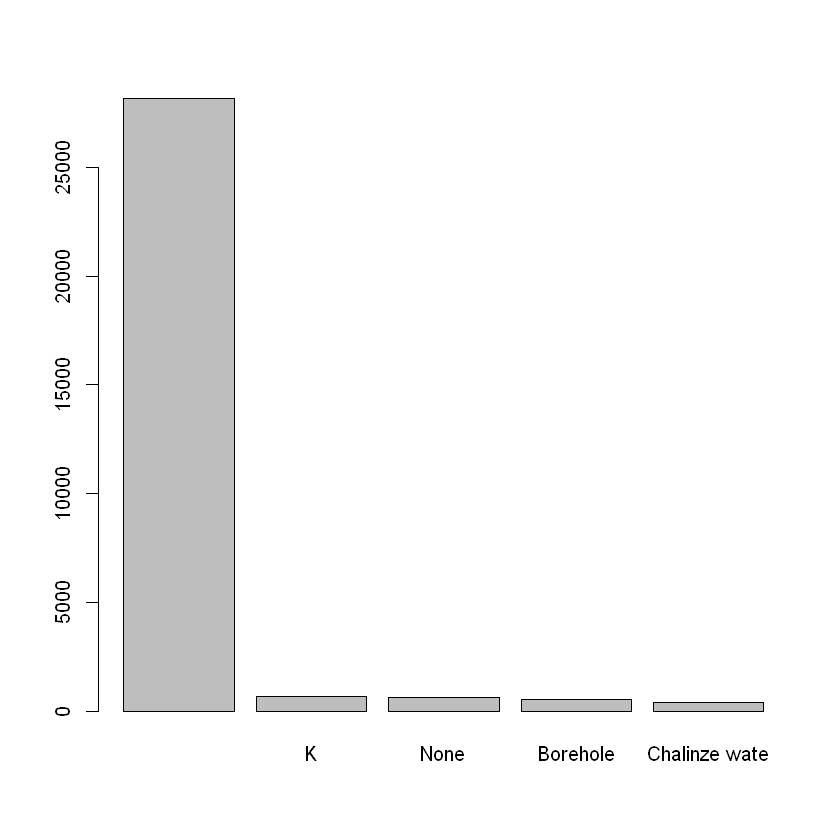

In [25]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot( (sort(factors, decreasing=TRUE)[1:5] ))
}

By taking a look at the barplots, some features might be interesting to keep because they have a large dominance in one category. For example, the $installer$ feature contains more than 16000 samples with the category $DWE$ so it might be useful to simply keep track of whether the installer is DWE or not (binary value). The same goes for $funder$, where there are a lot of samples corresponding to the class $Government\ Of\ Tanzania$.

In [26]:
convert_installer_to_binary <- function(df) {
    levels(df$installer) <- c(levels(df$installer), "1","0") 
    df$installer[df$installer == "DWE"] <- 1
    df$installer[df$installer != "1"] <- 0
    df <- transform(df, installer = as.integer(as.character(installer)))
    return(df)
}

In [27]:
convert_funder_to_binary <- function(df) {
    levels(df$funder) <- c(levels(df$funder), "1","0") 
    df$funder[df$funder == "Government Of Tanzania"] <- 1
    df$funder[df$funder != "1"] <- 0
    df <- transform(df, funder = as.integer(as.character(funder)))
    return(df)
}

In [141]:
demo_data <- convert_installer_to_binary(demo_data)

In [142]:
demo_data <- convert_funder_to_binary(demo_data)

By analyzing the rest of the barplots, either there are extremely few samples of each category of the feature, or there are majoritarily samples containing $none$ or an empty string. Therefore, we choose to remove them from the dataset.

In [28]:
remove_features_many_levels <- function(df) {
    df <- subset(df,select=-c(wpt_name,subvillage,ward))
    return(df)
}

In [47]:
categorical_variables <- which(sapply(subset(data,select=-c(status_group)),class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"

In [48]:
demo_data <- remove_features_many_levels(demo_data)

## One-hot encoding

Therefore, we can now remove the longitude and latitude features from the dataset and replace them with a new feature called $region$, representing the cluster in which the pump is located.

In [ ]:
install.packages('dummies')

In [49]:
library(dummies)

In [29]:
one_hot_encoding_training <- function(df) {
    categorical_variables <- which(sapply(subset(df,select=-c(status_group)),class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [30]:
one_hot_encoding_test <- function(df) {
    categorical_variables <- which(sapply(df,class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

## Handle the numerical features

### Preprocess the coordinates

The dataset contains $longitude$ and $latitude$ features which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region. Although there is already an attribute $region\_code$ in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into k different geographical regions based on $longitude$ and $latitude$. The advangate of this method compared to the $region\_code$ feature is that we can choose how small or large the different regions are.

In [45]:
install.packages("factoextra")


also installing the dependencies ‘rematch’, ‘cellranger’, ‘readxl’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘carData’, ‘pbkrtest’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘flashClust’, ‘leaps’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’





The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpnmnZYn/downloaded_packages


In [52]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [31]:
generate_regions <- function(df) {
    set.seed(19)
    coordinates <- as.data.frame(cbind(df$longitude,df$latitude))
    km_res <- kmeans(coordinates,8)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- km_res$cluster
    write.csv(km_res$centers,"cluster_centers.csv")
    return(df)
}

In [32]:
get_optimal_clustering_params <- function() {
    best_correlation <- 0
    best_seed <- 1
    correlations <- numeric(length(5:40))
    dum <- dummy.data.frame(demo_data[,ncol(demo_data),drop=F],names=c("status_group"), sep="_")
    coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))

    for(k in 5:40) {
        for(s in 1:30) {
            set.seed(s)
            km_res <- kmeans(coordinates,k)
            region_kmeans <- km_res$cluster

            correlation <- 0
            for(i in 1:ncol(dum)) {
                correlation <- correlation + abs(cor(region_kmeans,dum[,i]))
            }
            correlations[k] <- correlations[k] + correlation
            if(correlation > best_correlation) {
                best_k <- k
                best_correlation <- correlation
                best_seed <- s
            }
        }
    }
}

In [32]:
best_k
best_correlation
best_seed

[1] 8

[1] 0.3210632

[1] 19

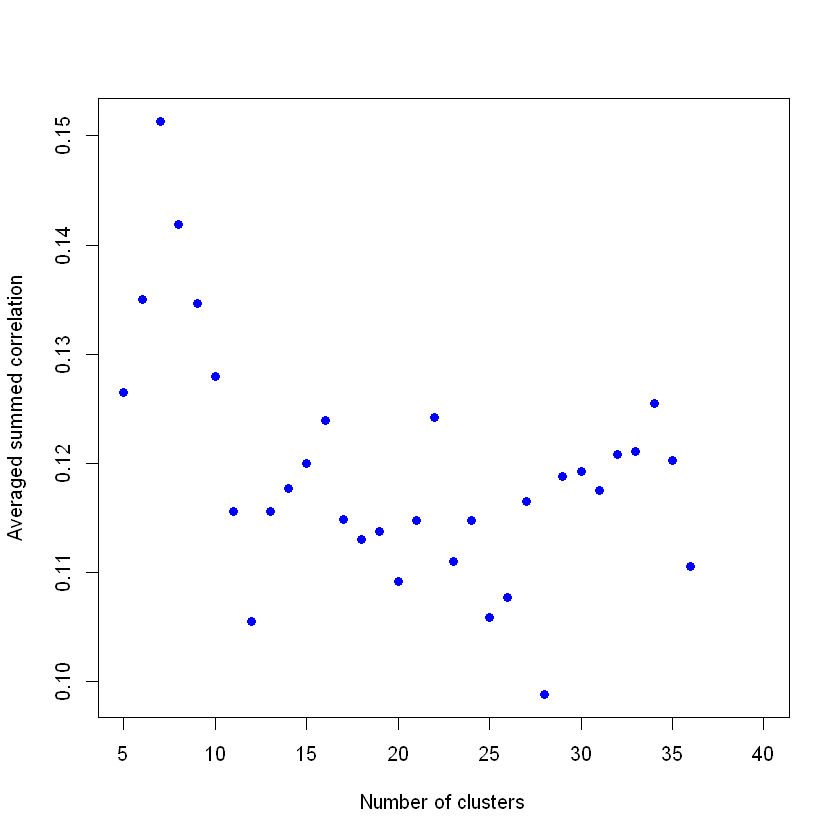

In [33]:
mean_cor <- correlations / 30
plot(5:40,mean_cor[5:40],xlab="Number of clusters",ylab="Averaged summed correlation",col = "blue",pch=19)

In [33]:
closest_cluster <- function(x) {
    centers <- read.csv("cluster_centers.csv")
    centers <- centers[,c("V1","V2")]
    cluster_dist <- apply(centers, 1, function(y) sqrt(sum((x-y)^2)))
    return(which.min(cluster_dist)[1])
}

In [34]:
set_existing_regions <- function(df) {
    clusters2 <- apply(df[,c("longitude","latitude")], 1, closest_cluster)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- clusters2
    return(df)
}

In [35]:
options(repr.matrix.max.cols=50)
head(eval_data,20)
head(data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
2,51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
3,17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
4,45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,,GeoData Consultants Ltd,VWC,,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
5,49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
7,24806,0,2011-03-02,Government Of Tanzania,550,Gover,36.39804,-7.541382,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,28965,0,2013-01-25,Finw,234,FinW,39.60742,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
9,36301,30,2013-01-23,Unicef,584,LGA,39.26295,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


The graphical representation of the regions after the k-means clustering is shown below.

In [58]:
set.seed(19)
coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))
km_res <- kmeans(coordinates,8)
demo_data <- subset(demo_data,select=-c(longitude,latitude))
demo_data$region_kmeans <- km_res$cluster

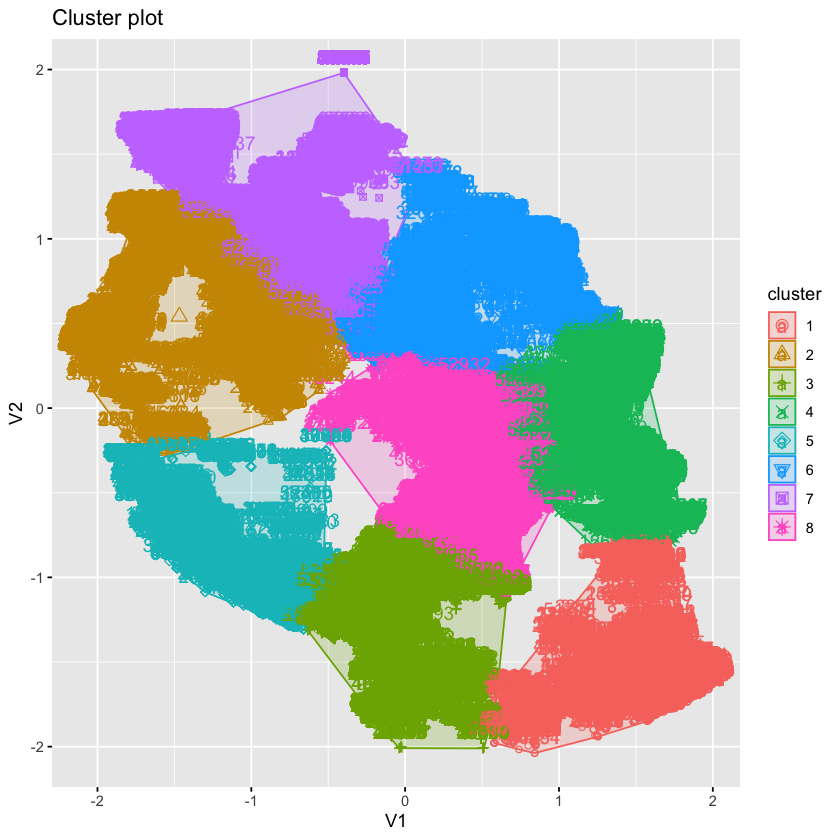

In [59]:
fviz_cluster(km_res,coordinates)

### Remove useless numerical features

The feature $id$ is different for each sample, and does not bring any information. It is therefore removed.

In [60]:
nlevels(as.factor(demo_data$id))

[1] 53042

In [36]:
remove_id <- function(df) {
    return(subset(df,select=-c(id)))
}

In [94]:
demo_data <- remove_id(demo_data)

## Dataset balancing

In order to avoid the previously described situation where the models will predict only the very frequent classes, some dataset balancing can be done. It is important to understand this does not necessarily yield better results, but it could, and this is why it was implemented. Indeed, sometimes the frequency of apparition of certain classes is actually very relevant, and moreover if the dataset is large enough the minority class might be representative enough in the sense that it contains all relevant information in its features to be classified.

The 2 dataset balancing techniques that were tested are SMOTE and oversampling.

### SMOTE

In [17]:
install.packages("performanceEstimation")

Installing package into 'C:/Users/minhx/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'performanceEstimation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minhx\AppData\Local\Temp\Rtmpop2NsV\downloaded_packages


In [63]:
library(performanceEstimation)

In [37]:
create_smote_dataset <- function(df) {
    print(head(df))
    df <- smote(status_group ~ ., df, perc.over = 3,perc.under=3)
    return(df)
}

In [65]:
demo_data <- create_smote_dataset(demo_data)

  amount_tsh date_recorded                 funder gps_height  installer
2          0          3064                  Shipo       1978      SHIPO
3          0          3086                   Lvia          0       LVIA
4         10          3885        Germany Republi       1639        CES
5          0          3081                   Cmsr          0       CMSR
6         50          3057                Private         28    Private
7          0          3659 Government Of Tanzania          0 Government
  num_private       basin      region region_code district_code             lga
2           0      Rufiji      Iringa          11             4          Njombe
3           0 Wami / Ruvu      Dodoma           1             4        Chamwino
4           0     Pangani Kilimanjaro           3             5             Hai
5           0 Wami / Ruvu      Dodoma           1             4        Chamwino
6           0 Wami / Ruvu       Pwani          60            43        Mkuranga
7           0   

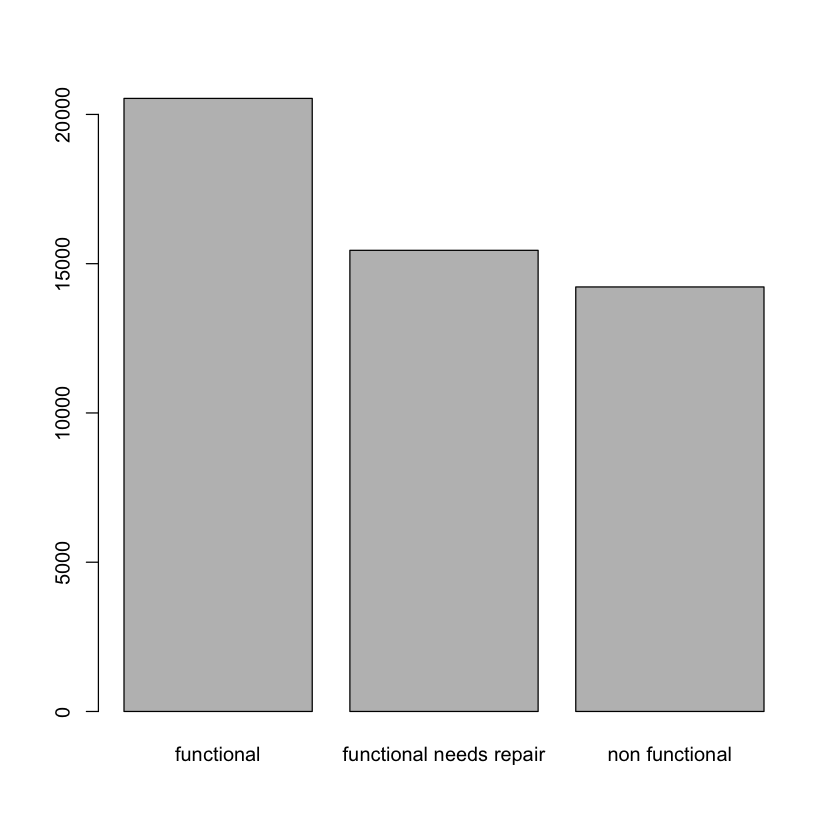

In [66]:
barplot(table(demo_data$status_group))

In [68]:
dim(demo_data)

[1] 50206    39

### Over sampling

In [38]:
create_over_sampling_dataset <- function(df) {
    to_dup <- df[df$status_group == "functional needs repair",]
    for(i in 1:1) {
        df <- rbind(df,to_dup)
    }
    #to_remove <- which(data$status_group == "functional")[1:10000]
    #print(to_remove)
    return(df)
}

In [160]:
demo_data <- data

In [161]:
dem <- create_over_sampling_dataset(demo_data)

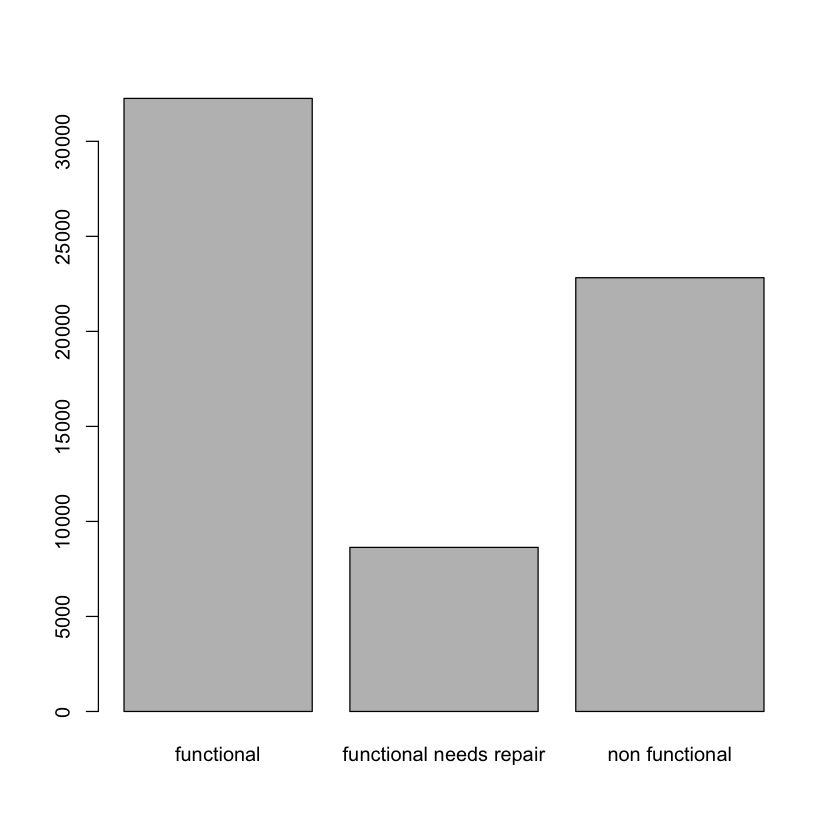

In [162]:
barplot(table(dem$status_group))

# Feature selection

## mRMR on one-hot encoded data

In [39]:
apply_mrmr_numerical <- function(df) {
    #print(head(df[,ncol(df)]))
    X <- subset(df,select=-c(status_group))
    print(colnames(X))
    dum <- dummy.data.frame(subset(df,select=c(status_group)),names=c("status_group"), sep="_")
    correlation <- numeric(ncol(X))
    print(head(dum))
    #print(head(dum[,1]))
    for(i in 1:ncol(dum)) {
        correlation <- correlation + abs(cor(X,dum[,i]))
    }
    correlation <- correlation / 3
    #print(correlation)
    n <- ncol(X)
    selected_features <- c()
    candidate_features <- 1:n
    #message(correlation)
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if (length(selected_features)>0) {
            cor_selected_candidates <- cor(X[,selected_features,drop=F],X[,candidate_features,drop=F])
            redundancy_score <- apply(cor_selected_candidates,2,mean)
        }
        mRMR_score <- correlation[candidate_features] - redundancy_score
        best_candidate <- candidate_features[which.max(mRMR_score)]
        message(best_candidate)
        selected_features<-c(selected_features,best_candidate)
        
        candidate_features <- setdiff(candidate_features,best_candidate)
    }
    return(selected_features)
}

In [41]:
get_k_mrmr_variables <- function(df,k) {
    sorted_features <- apply_mrmr_numerical(df[,1:ncol(df)])    
    df <- df[,sorted_features[1:k]]
    return(df)
}

## mRMR on categorical data

In [40]:
apply_mrmr <- function(X,Y) {
    selected_features <- c()
    n <- ncol(X)
    candidate_features <- 1:n
    correlation <- c()
    for (i in 1:n) {
        chi_value <- chisq.test(X[,i], Y)
        correlation[i] <- chi_value$statistic
    }
    message(correlation)
    correlation <- correlation/max(correlation)
    redundancy_score <- c()
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if(length(selected_features) > 0) {
            for (c in 1:length(candidate_features)) {
                redundancy_cor <- numeric(length(selected_features))
                for (s in 1:length(selected_features)) {
                    #print(length(X[,selected_features[s]]))
                    #print(length(X[,candidate_features[c]]))
                    chi_value <- chisq.test(X[,selected_features[s]],X[,candidate_features[c]])
                    redundancy_cor[s]  <- chi_value$statistic
                    message(chi_value$statistic)
                }
                message(redundancy_cor)
                redundancy_score[c] <- mean(redundancy_cor)
            }
        }
        #message(redundancy_score)
        mRMR_score <- correlation[candidate_features] - redundancy_score
        #message(mRMR_score)
        #message(candidate_features)
        max_score_candidate <- candidate_features[which.max(mRMR_score)]
        message(max_score_candidate)
        selected_features <- c(selected_features,max_score_candidate)
        candidate_features <- setdiff(candidate_features,max_score_candidate)
    }
    #write(selected_features,"selected_features.txt")
    #print(selected_features)
}

## PCA

In [42]:
pca2 <- function(df,nb_components){
    X <- df[,setdiff(colnames(df),"status_group")]
    # Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
    X_pca <- prcomp(X, scale=TRUE) 

    ## make a scree plot
    X_pca.var <- X_pca$sdev^2
    X_pca.var.per <- round(X_pca.var/sum(X_pca.var)*100, 1)
 
    barplot(X_pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

    return(X_pca)

}

pca2_select <- function (df,X_pca,nb_components){
   
    X_pca <- predict(X_pca,newdata=df)[,1:nb_components]
   
    #df_pca<-data.frame(X_pca,df[,"status_group"])
    #names(df_pca)[length(names(df_pca))]<-"status_group" 
    return(X_pca)
}


,PC1,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC2,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC3,PC30,PC31,⋯,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC4,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC5,PC50,PC6,PC7,PC8,PC9,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0.1422004,4.73789710,-3.7774477,-2.4175118,0.3627781,0.014107703,2.64737194,1.0556379,-0.2433008,-4.7696795,2.4239214,-2.1888820,-1.8011605,-0.89558964,1.3684825,13.0008559,-2.9292394,2.17115862,4.8973538,2.449458805,-1.7063664,2.8286022,3.5871625,-0.3039644,-3.3225913,⋯,-1.8451100,-0.5053846,-2.6214424,1.6758888,1.0886073,-1.35936260,0.1360649,-2.156381,-1.96498861,-0.05658106,0.79611934,-0.43576123,-1.308715,-0.01565141,-0.72601238,0.08564455,0.85954497,1.08326875,2.466062,1.1002988,-1.54186468,0.5384452,1.5816984,-3.2934711,functional
3,1.3551975,0.31517882,1.0911793,-3.0192451,-0.2634589,-2.277061715,-3.08123103,-1.0666948,-1.4335927,1.0301223,1.2676524,4.4026284,-0.9946493,-0.60453117,-0.1845632,1.6394496,0.4347905,-0.23939780,0.7386134,-0.271307053,1.0138925,0.1258319,-0.3185119,-0.5089410,1.1309114,⋯,0.1076175,1.9081016,-0.1198025,0.4266696,-2.0482852,1.46495532,-2.1554758,-4.846687,0.84783294,-0.32656910,-0.11447037,0.67489238,-1.476230,-0.24701041,0.30706247,-0.07566428,0.35454594,0.19850440,-3.255916,-0.8106496,-1.54895867,-3.5078484,-2.9059162,2.1519053,functional
4,-4.4772377,-0.95202202,-0.1723763,-1.1140211,-1.1152061,-0.009461555,-1.41140195,-0.3964169,2.8097381,-0.8293456,-0.1545236,-0.2084357,1.7027865,0.61472101,-2.6519122,0.1800655,0.7488732,-2.39025575,2.5967794,1.405056920,1.2535529,0.1503675,-2.6568820,-1.1992217,-0.5269160,⋯,1.4709682,-1.7045716,0.4438254,0.3748039,0.6147990,-0.22978754,-2.1892074,1.258881,0.06283596,2.32227565,1.86587452,0.79683565,-1.199406,1.58919930,0.85792162,0.20155806,-0.72000084,0.97221802,-1.933859,-0.4683181,-2.73429776,2.0181177,1.3983427,0.7312356,functional
5,3.1581407,-0.03882637,1.7721561,-2.1639031,-0.3607180,-1.528831267,-1.43362821,-0.5736171,-2.5562884,0.3583138,-0.2050206,-0.2481155,-0.5242314,0.08701058,-0.2510509,1.1624587,0.1802814,-0.51392397,0.9044260,-0.785054746,2.7245920,0.5982718,-0.1791075,-0.8844563,1.6513982,⋯,-1.4126520,1.2110244,-1.8405269,-1.5258123,-3.1703855,1.71989196,-1.9566216,-2.985885,0.24715429,1.60645209,-1.29563732,-1.18798617,-2.341308,1.04505772,0.08531714,-0.55092512,-0.09879727,0.02992364,-1.412326,-0.7108099,-0.64661190,-1.3012442,-1.3974918,1.1916273,non functional
6,1.8186173,-1.79337879,-2.4066110,-0.1278334,2.6732053,0.661530327,1.85417881,-2.6040918,-1.3916564,0.9330061,-0.5265823,9.1847877,2.6037067,0.77837434,-0.7044244,-0.7748405,-2.7520139,-0.08011406,1.2191096,-2.117933813,0.9397069,-0.3988439,-0.1325509,2.5093050,-0.9299869,⋯,1.8085350,0.2486526,-2.3785461,-1.6654162,0.8361394,-0.08977567,-1.2584733,-1.882693,0.14151491,-0.80041266,0.32342191,0.09125196,1.634799,0.22396007,1.92392722,1.82360522,0.72130852,-1.08358060,3.238764,0.3340740,-0.06423564,3.0454870,2.0934206,-1.2761156,functional
7,3.1838958,2.58745118,1.8352241,-0.6703070,1.3074122,-0.264921044,0.01562419,1.1131884,2.7434250,0.7721274,-1.3863207,-0.9474413,1.1482834,0.26999250,1.1895965,0.7801701,-0.2768504,-0.86308763,0.0744318,-0.003615789,0.2461089,-0.6452805,-2.3181586,1.0032617,0.5311455,⋯,1.0910948,-0.1519931,-1.9933048,0.5579142,-1.1584682,-0.12682617,0.1540672,1.451001,-0.37172520,0.45500165,-0.09884611,1.51738798,1.049699,-0.89323261,-1.47908519,0.25478576,1.34668561,-1.37500203,-1.083295,-0.8440941,2.57060606,-1.4057763,-0.3344205,-1.0932233,non functional


         PC1        PC2        PC3        PC4         PC5         PC6
2 -0.4272574  0.3734111  0.4302253 -0.8395074  0.13619036 -0.04178028
3 -0.7039876 -0.1656400 -0.6954159 -1.0127670 -0.03931382  1.14171495
4 -0.3712466 -0.8283674 -0.2209735  0.8231128 -0.10791288  0.14686186
5 -0.6073781 -0.9300379 -0.5236802 -1.2367387 -0.61245370  0.06781762
6 -0.5749024 -0.5993792  1.4361723 -1.4489816  1.59577975  1.81657425
7  0.7289054  0.9577297 -0.8117317  0.8257123  1.11698237 -1.57665630
         PC7        PC8         PC9        PC10        PC11        PC12
2  0.5037538 -1.4711778  1.79435135  0.03803749  0.09349824 -0.44883825
3 -0.7470122  1.7243926 -0.07785277  1.21044774  0.68122609  0.07468783
4  1.5874667  0.8126318  1.51831391  0.16822638  2.29568801 -1.21475559
5 -0.5365968  2.4852043  1.23966237 -0.35366810  0.67166148  1.11334604
6 -0.8078594 -2.1813121  0.99078384 -0.22617209  0.45878860  0.82728695
7 -0.3298802  0.4993492  0.36092647  0.97026703 -0.56711188 -1.17915839
      

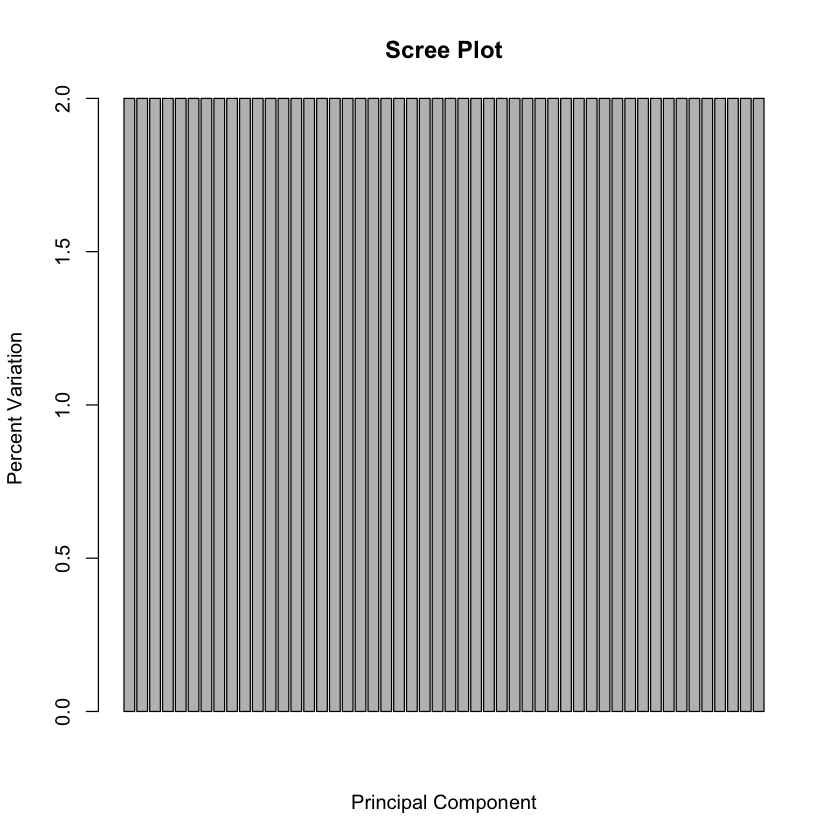

In [78]:
library(dummies)
load(file = "data_preproc.Rdata")

#data_preproc_onehot <- dummy.data.frame(data_preproc, sep="_")
#colnames(data_preproc_onehot) <- gsub(colnames(data_preproc_onehot),pattern = " ", replacement = "_")
#targets <- c("status_group_functional","status_group_functional_needs_repair","status_group_non_functional")
#X <- data_preproc_onehot[,setdiff(colnames(data_preproc_onehot),targets)]

head(data_preproc)

X_pca <- pca2(data_preproc)
train <- pca2_select(data_preproc,X_pca,20)
test <- pca2_select(data_preproc,X_pca,20)

print(head(train))
print(head(test))


# Call the preprocessing functions

In [43]:
preprocess_basic_training <- function(df){
    df <- remove_id(df)
    df <- remove_scheme_name(df)
    df <- one_hot_construction_year(df)
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    df <- remove_useless_features(df)
    df <- create_binary_features_training(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- convert_funder_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    return (df)
}

In [44]:
preprocess_training <- function(df) {
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    print(head(df))
    df_ordered <- get_k_mrmr_variables(df,100)
    df_ordered <- df_ordered[,order(names(df_ordered))]
    print(head(df_ordered))
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    df <- create_over_sampling_dataset(df)
    #df <- create_smote_dataset(df)
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    return(df)
}

In [45]:
preprocess_training2 <- function(df) {
    df <- preprocess_basic_training(df)
    df <- df[,order(colnames(df))]
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    X_pca <- pca2(df)
    save(X_pca, file = "X_pca.Rdata")
    df_pca <- df[,setdiff(colnames(df),"status_group")]
    print(dim(df_pca))
    df_no_status <- pca2_select(df_pca,X_pca,50)
    df_ordered <- df_no_status[,order(colnames(df_no_status))]
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    # df <- create_smote_dataset(df) peut etre que faire le pca puis le smote marchera mtn vu qu'il est à la fin mtn
    return(df)
}

In [46]:
preprocess_test <- function(df) {
    df <- remove_id(df)
    df <- remove_scheme_name(df)
    df <- one_hot_construction_year(df)
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    df <- remove_useless_features(df)
    df <- create_binary_features_test(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- convert_funder_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            #print(column_names[c])
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
      
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    df <- df[,order(names(df))]
    return(df)
}

In [52]:
preprocess_test2 <- function(df) {
    df <- preprocess_test(df)
    load(file = "X_pca.Rdata")
    print(dim(df))
    df_no_status <- pca2_select(df,X_pca,50)
    df_ordered <- df_no_status[,order(colnames(df_no_status))]

   # df_no_status <- subset(df_no_status,select=-c(status_group))
    #df_ordered <- df_no_status[,order(colnames(df_no_status))]

    return(df_ordered)
}

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

[1] 53042   243


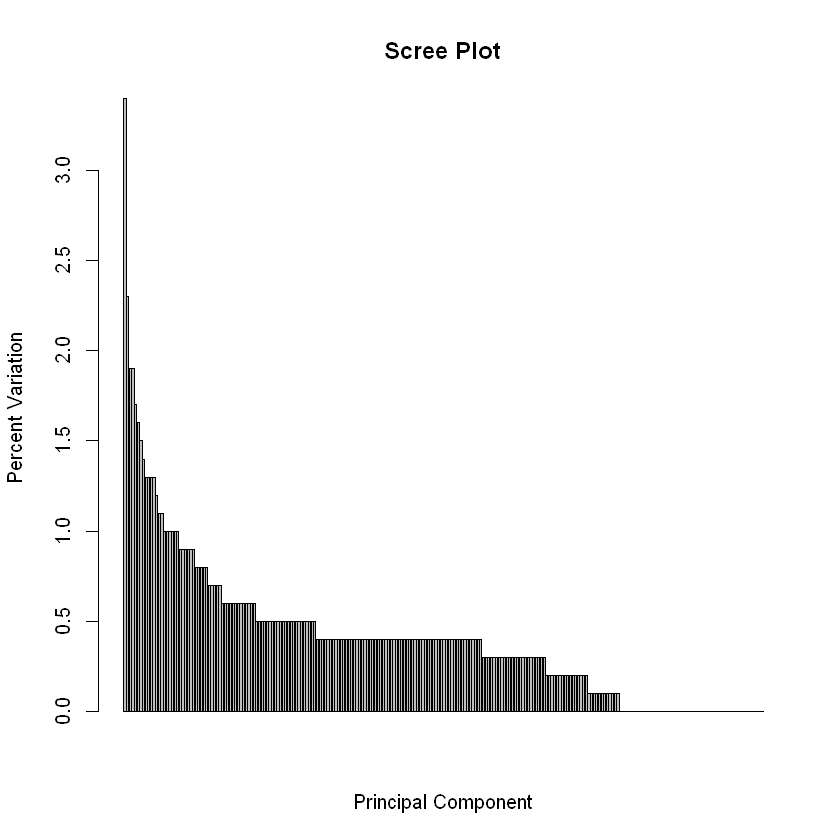

In [51]:
#data_preproc <- preprocess_training(data)
data_preproc <- preprocess_training2(data)
#save(data_preproc, file = "data_preproc.Rdata")

,amount_tsh,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_/_Southern_Coast,basin_Wami_/_Ruvu,construction_year_1970s,construction_year_1980s,construction_year_2000s,construction_year_2010s,district_code,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,⋯,region_Mara,region_Mbeya,region_Mtwara,region_Rukwa,region_Shinyanga,region_Tabora,region_code,region_kmeans,source_class,source_dam,source_lake,source_machine_dbh,source_rainwater_harvesting,source_river,source_shallow_well,source_spring,water_quality_salty,water_quality_soft,water_quality_unknown,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_hand_pump,waterpoint_type_improved_spring,waterpoint_type_other,status_group
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,11,3,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,functional
6,50,0,0,0,0,0,0,0,0,1,0,0,0,0,43,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,60,4,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,functional
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,functional
10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,18,7,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,non functional
11,30,0,0,0,0,0,1,0,0,0,0,0,1,0,5,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,4,4,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,non functional
12,0,0,0,0,0,0,1,0,0,0,0,0,0,1,7,1,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,2,6,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,non functional


[1] 47359   101

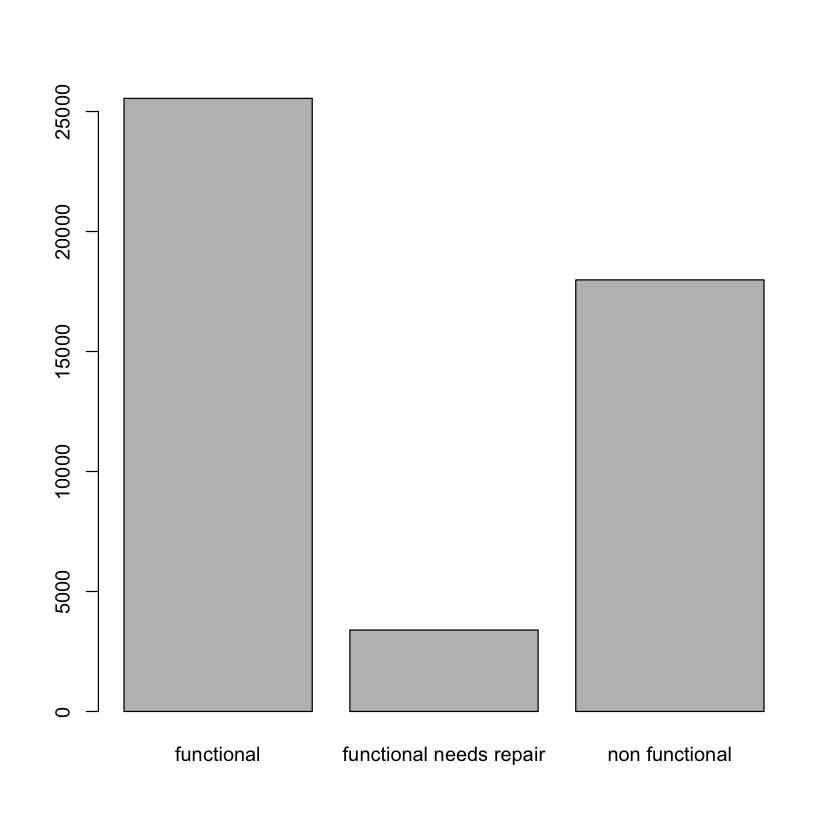

In [156]:
head(data_preproc)
dim(data_preproc)
barplot(table(data_preproc$status_group))

In [53]:
#test_preproc <- preprocess_test(eval_data)
test_preproc <- preprocess_test2(eval_data)
#save(test_preproc, file = "test_preproc.Rdata")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

[1] 14850   243


In [286]:
dim(test_preproc)

[1] 14850   243

In [287]:
train_cols <- colnames(data_preproc)
for(c in colnames(test_preproc)) {
    if(!(c %in% train_cols)) {
        print(c)
    }
}

[1] "amount_tsh"
[1] "basin_Internal"
[1] "construction_year_1960s"
[1] "construction_year_1990s"
[1] "date_recorded"
[1] "district_code"
[1] "extraction_type_class_rope_pump"
[1] "extraction_type_class_submersible"
[1] "extraction_type_class_wind-powered"
[1] "extraction_type_group_india_mark_ii"
[1] "extraction_type_group_india_mark_iii"
[1] "extraction_type_group_other_handpump"
[1] "extraction_type_group_other_motorpump"
[1] "extraction_type_group_rope_pump"
[1] "extraction_type_group_swn_80"
[1] "extraction_type_group_wind-powered"
[1] "lga_Arusha_Rural"
[1] "lga_Babati"
[1] "lga_Bahi"
[1] "lga_Biharamulo"
[1] "lga_Bukoba_Rural"
[1] "lga_Bukoba_Urban"
[1] "lga_Bukombe"
[1] "lga_Bunda"
[1] "lga_Chamwino"
[1] "lga_Chato"
[1] "lga_Dodoma_Urban"
[1] "lga_Geita"
[1] "lga_Hanang"
[1] "lga_Handeni"
[1] "lga_Igunga"
[1] "lga_Ilala"
[1] "lga_Ileje"
[1] "lga_Ilemela"
[1] "lga_Iramba"
[1] "lga_Iringa_Rural"
[1] "lga_Kahama"
[1] "lga_Karagwe"
[1] "lga_Kibaha"
[1] "lga_Kibondo"
[1] "lga_Kigoma

## Feature engineering

## Feature selection

# Model selection

## Model 1


In [66]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
   
    full_confusion_matrix <-matrix(0, nrow = 3, ncol = 3)
    colnames(full_confusion_matrix) <- colnames(confusion_matrix)
    rownames(full_confusion_matrix) <- colnames(confusion_matrix)
    full_confusion_matrix[rownames(confusion_matrix),] <- confusion_matrix[rownames(confusion_matrix),]
    return((full_confusion_matrix[1,1]+full_confusion_matrix[2,2]+full_confusion_matrix[3,3])/sum(full_confusion_matrix))
}


computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
 
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

In [67]:
library("nnet")
library("randomForest")
library("RSNNS")

#Cross validation
crossValidationInOutSample <- function(parameter,k,model_type){
    data <- data_preproc
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    # 2. Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))
    
     # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)

    # 3. For each unique group:
    for (i in 1:k){
        if (model_type=="nnet" || model_type=="random_forest"){
            #3.1 Take the group as a hold out or test data set
            train_data <- data[-splits[[i]],]
            #3.2 Take the remaining groups as a training data set
            test_data <- data[splits[[i]],]
            Y <- test_data[,target_variable]
            print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
        }
        if (model_type=="radial" || model_type=="mlp"){
            train_data <- scaled[-splits[[i]],]
            train_label <- data[-splits[[i]],target_variable]
            test_data <- scaled[splits[[i]],]
            test_label <- data[splits[[i]],target_variable]
            n_train <- dim(train_data)[1]
            Y <- test_label
        } 
        #3.3 Fit a model on the training set and evaluate it on the test set
        if(model_type=="nnet"){
              model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,
                                 skip=FALSE, maxit=100,rang=0.2,MaxNWts=10000,trace=FALSE)
              Y_pred<-predict(model_single_out,test_data[,-target_variable])
              Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
     
        }
        if(model_type=="random_forest"){
            model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=parameter,keep.forest=TRUE)
            Y_hat <- predict(model_single_out,newdata = test_data[,-target_variable])
            
            #accuracy_vec[i] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
        }
        if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                           size=parameter, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
          Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]

        }
        if(model_type=="mlp"){
              model <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)
              Y_pred <- predict(model,test_data)
              colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
              Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
         }


        accuracy_vec[i] <- computeResults(Y,Y_hat,paste(i,"fold"))

        }

    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    
    accuracy <- inOutSampleTest(data,scaled,target_variable,data_idx,half_split,parameter)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}




Warning message:
"package 'nnet' was built under R version 4.0.5"
Warning message:
"package 'randomForest' was built under R version 4.0.5"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'RSNNS' was built under R version 4.0.5"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.0.5"


In [68]:
inOutSampleTest <- function(data,scaled,target_variable,data_idx,half_split,parameter){
     # 4.2 Split training-test for in/out of sample predictions
    if (model_type=="nnet" || model_type=="random_forest"){
        train_data <- data[data_idx[1:half_split],]
        test_data <- data[data_idx[(half_split+1):nrow(data)],]
    } 
    if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        n_train <- dim(train_data)[1]
    } 
    train_label <- data[data_idx[1:half_split],target_variable]
    test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
    Y <- test_label
    if(model_type=="nnet"){
        model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=10000)

    } 
    if(model_type=="random_forest"){
            model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=parameter,keep.forest=TRUE)
            
    } 
    if (model_type=="radial"){
      model_single_out <- RSNNS::rbf(as.matrix(train_data),
                       decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                       size=parameter, 
                       maxit=75, 
                       #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                       #initFunc="RBF_Weights_Kohonen",
                       learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
    } 
    if(model_type=="mlp"){
          model_single_out <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)
    } 
    
    if(model_type=="random_forest"){
        # In sample evaluation 
        Y_hat_single_out_in_sample  <- predict(model_single_out,train_data[,-target_variable])
        # Out of sample evaluation 
        Y_hat_single_out_out_sample <- predict(model_single_out,test_data[,-target_variable])
    }else{
        # In sample evaluation 
        Y_pred<-predict(model_single_out,train_data[,-target_variable])
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat_single_out_in_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
         # Out of sample evaluation 
        Y_pred<-predict(model_single_out,test_data[,-target_variable])
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat_single_out_out_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
    }
      
    #print(head(Y_hat_single_out_in_sample))  
    accuracy_in_sample <- computeResults(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}


In [69]:
applyCVInOutComp <- function(parameters,k,model_type){
    error_in_sample_vec <- numeric()
    error_out_sample_vec <- numeric()
    error_cv_vec <- numeric()

    for(parameter in parameters){
        print(paste("[INFO] - Testing h=",parameter))
        results <- crossValidationInOutSample(parameter,k,model_type)
        error_in_sample_vec <- c(error_in_sample_vec,results$in_sample)
        error_out_sample_vec <- c(error_out_sample_vec,results$out_sample)
        error_cv_vec <- c(error_cv_vec,results$cv)
    }
    save(error_in_sample_vec,error_out_sample_vec,error_cv_vec,file="CV.Rdata")
}
    

In [70]:
model_type = "nnet"
k <- 2
#parameters <- c(c(2,1),c(5,2),3)
parameters <- list(1,3,2)
load(file = "data_preproc.Rdata")
applyCVInOutComp(parameters,k,model_type)


[1] "[INFO] - Testing h= 1"
[1] "[INFO] - Training set size: 26521 - Testing set size 26521"
[1] "[INFO] - Confusion matrix 1 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional          12922                    1665           4462
  non functional       1463                     311           5698
[1] "[INFO] - Accuracy 1 fold : 0.702085140077674"
[1] "[INFO] - Misclassification rate 1 fold : 0.297914859922326"
[1] "[INFO] - Training set size: 26521 - Testing set size 26521"
[1] "[INFO] - Confusion matrix 2 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional          12796                    1419           4170
  non functional       1740                     467           5929
[1] "[INFO] - Accuracy 2 fold : 0.706044266807436"
[1] "[INFO] - Misclassification rate 2 fold : 0.293955733192564"
[1] "[INFO] - CV - Accuracy: 0.704064703442555"
[1] "[INFO] - CV - Mean misclassification 

In [ ]:
load("CV.Rdata")
plot(parameters,error_in_sample_vec,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy")
lines(parameters,error_in_sample_vec)
lines(parameters,error_out_sample_vec,col="blue")
lines(parameters,error_cv_vec,col="red")
legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))

In [71]:
#install.packages("RSNNS")
#install.packages("nnet")
library("nnet")
library("randomForest")
library("RSNNS")

BaggingNN <- function(n_bagging_resamples,model_type,hidden_nodes){
    
     ######################
    # TO DO 
    
    # manually select model names
    #model_names = seq(n_bagging_resamples)

    # create a list based on models names provided
    #list_models = lapply(model_names, get)

    # set names
    #names(list_models) = model_names
    ######################
    data <- data_preproc
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # 2. Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         # 2. Normalize dataset
         data<-data.frame(data_n,data[,"status_group"])
         names(data)[length(names(data))]<-"status_group" 
         train_data <- data[data_idx[1:half_split],]
         test_data <- data[data_idx[(half_split+1):nrow(data)],]
         n_train <- length(train_data)
         Y_hat_bagged<-array(0,c(length(test_data),1))
         Y <- test_data[,target_variable]
    }
     if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        train_label <- data[data_idx[1:half_split],target_variable]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
        n_train <- dim(train_data)[1]
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
        Y <- test_label
    }
 
   
    Y_pred_models<-numeric()
   

    accuracy_vec<-array(0,c(1,n_bagging_resamples))
        print("okkke-1-1")
    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
        #model<- 0
       # Y_pred <-  0
        print("okkke11")
      if (model_type == "nnet"){
          print("okkke22")
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=hidden_nodes, maxit=75,trace=F,rang=0.2,MaxNWts=20000)
           Y_pred <- predict(model,test_data[,-target_variable])
           print("whaaat")
      }
     if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")

     }
     if(model_type=="mlp"){
          model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = hidden_nodes, maxit = 100)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
     }
      

     
    print(i)
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      accuracy_vec[i] <- computeResults(Y,result_classification,paste(i,"th model"),verbose=F)
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     #Y <- test_data[,target_variable]

     accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model")
     print(accuracy_bag)
     if (model_type == "nnet"){
             print("okk444")
             model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=20000)
              
     }
     if (model_type == "radial"){  
         model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=150, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                          #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
      if(model_type=="mlp"){
         model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = hidden_nodes, maxit = 150)
      }
     Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
                           
     return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec))
}
print("done")


[1] "done"


In [72]:
#install.packages("RSNNS")
#install.packages("nnet")
library("nnet")
library("randomForest")
library("RSNNS")

Bagging_test <- function(n_bagging_resamples,model_type,hidden_nodes){
    data <- data_preproc
    target_variable <- ncol(data)
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # 2. Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         # 2. Normalize dataset
         data<-data.frame(data_n,data[,"status_group"])
         names(data)[length(names(data))]<-"status_group" 
         train_data <- data[data_idx[1:half_split],]
         test_data <- test_preproc
         n_train <- length(train_data)
         Y_hat_bagged<-array(0,c(length(test_data),1))
    }
     if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx,]
        train_label <- data[data_idx,target_variable]
        test_data <- test_preproc
        n_train <- dim(train_data)[1]
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
    }
 
   
    Y_pred_models<-numeric()
   

    accuracy_vec<-array(0,c(1,n_bagging_resamples))
    print("okkke-1-1")
    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
        #model<- 0
       # Y_pred <-  0
        print("okkke11")
      if (model_type == "nnet"){
          print("okkke22")
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=2, maxit=75,trace=F,rang=0.2,MaxNWts=20000)#to change ! (size)
           Y_pred <- predict(model,test_data)
           print("whaaat")
      }
     if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")

     }
     if(model_type=="mlp"){
          model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = hidden_nodes, maxit = 100)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
     }
      

     
    print(i)
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     if (model_type == "nnet"){
             print("okk444")
             model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=300,rang=0.2,MaxNWts=20000)
              
     }
     if (model_type == "radial"){  
         model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=150, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                          #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
      if(model_type=="mlp"){
         model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = hidden_nodes, maxit = 150)
      }
     Y_pred_single_out <- predict(model_single_out,test_data)
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     return(list(single=Y_hat_single_out,bag=Y_hat_bagged))
}
print("done")


[1] "done"


In [73]:
load(file = "data_preproc.Rdata")
results <- BaggingNN(n_bagging_resamples=1,"mlp",hidden_nodes=c(8))


[1] "okkke-1-1"
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 1
[1] "[INFO] - Confusion matrix bagged model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12282                    1151           2833
  functional needs repair        187                     269             79
  non functional                2058                     492           7170
[1] "[INFO] - Accuracy bagged model : 0.743599411786886"
[1] "[INFO] - Misclassification rate bagged model : 0.256400588213114"
[1] 0.7435994


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] "[INFO] - Confusion matrix single model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12632                    1180           3198
  functional needs repair        214                     275             91
  non functional                1681                     457           6793
[1] "[INFO] - Accuracy single model : 0.742807586440934"
[1] "[INFO] - Misclassification rate single model : 0.257192413559066"


In [ ]:
Y_pred <- Bagging_test(n_bagging_resamples=1,"nnet",hidden_nodes=128)



## Model 2


The second model that was implemented is a Random Forest. A hyperparameter of this model is the number of trees that is used. Different values for this hyperparameter were therefore tested in order to find the ont yielding the best solution in terms of accuracy.

In [45]:
library("randomForest")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [75]:
n_trees <- c(14)
data <- data_preproc
accuracy_vec <- array(0,length(n_trees))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
target_variable <- ncol(data)
index <- 1
best_accuracy <- 0

for (i in n_trees){
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i,keep.forest=TRUE)
    print(model$test$confusion)
    accuracy_vec[index] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
    if(accuracy_vec[index] > best_accuracy) {
        best_model_ <- model
        best_accuracy <- accuracy_vec[index]
    }
    index <- index + 1
}
accuracy_vec

                        functional functional needs repair non functional
functional                   12065                     604           1775
functional needs repair        951                     624            345
non functional                2327                     261           7569
                        class.error
functional                0.1647051
functional needs repair   0.6750000
non functional            0.2547996


[1] 0.763816

[1] 0.7889748 0.8021242 0.8039193 0.8083859 0.8096800 0.8123099 0.8167766
 [8] 0.8126021 0.8156078 0.8140633 0.8162339 0.8170270 0.8171105 0.8175697
[15] 0.8148146

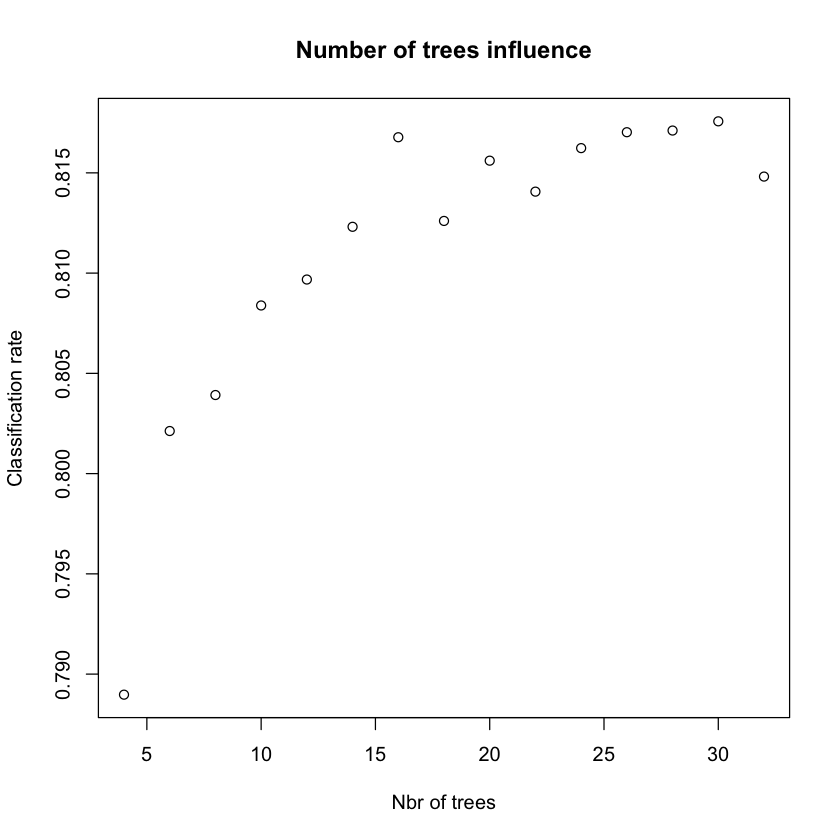

In [85]:
accuracy_vec
plot( c(4,6,8,10,12,14,16,18,20,22,24,26,28,30,32),accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

In [59]:
Y_pred <- predict(best_model_,newdata = test_preproc)

In [65]:
res <- cbind("id"=test_preproc$id,"status_group"=as.character(Y_pred))

In [66]:
head(test_preproc,30)

,amount_tsh,basin_Lake_Nyasa,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_/_Southern_Coast,date_recorded,district_code,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india_mark_ii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_submersible,extraction_type_group_swn_80,gps_height,id,installer,lga_Bagamoyo,⋯,quantity_unknown,region_Dodoma,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Mbeya,region_Mtwara,region_Mwanza,region_Ruvuma,region_Shinyanga,region_code,source_class,source_machine_dbh,source_river,source_shallow_well,source_spring,water_quality_milky,water_quality_salty,water_quality_soft,water_quality_unknown,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_hand_pump,waterpoint_type_improved_spring
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,15740,3,0,0,0,1,0,0,0,0,0,0,1,0,0,1996,50785,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,15740,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1569,51630,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,15737,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1567,17168,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,15727,43,0,0,0,1,0,0,0,0,0,0,1,0,0,267,45559,0,0,⋯,0,0,0,0,0,1,0,0,0,0,0,80,0,0,0,1,0,0,0,1,0,0,0,0,0
5,500,0,0,0,0,1,15791,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1260,49871,0,0,⋯,0,0,0,0,0,0,0,0,0,1,0,10,0,0,0,0,1,0,0,1,0,1,0,0,0
6,0,0,0,1,0,0,15768,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1685,52449,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0
7,0,0,0,0,1,0,15035,7,0,1,0,0,0,0,0,1,0,0,0,0,0,550,24806,0,0,⋯,0,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,1,15730,4,0,0,0,0,1,0,0,0,0,0,0,1,0,234,28965,0,0,⋯,0,0,0,0,0,0,0,1,0,0,0,9,0,1,0,0,0,0,0,1,0,0,1,0,0
9,30,0,0,0,0,1,15728,33,1,0,0,0,0,0,1,0,0,0,0,0,0,584,36301,0,0,⋯,0,0,0,0,0,0,0,1,0,0,0,90,0,0,0,0,1,0,0,1,0,1,0,0,0


In [67]:
head(res,30)

id,status_group
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional needs repair
52449,functional
24806,non functional
28965,non functional
36301,non functional
54122,functional needs repair


In [62]:
write.csv(res,"submission.csv",row.names=FALSE)

## Model 3

Here we will do a model based on SVM with the package "e1071"
The svm function is used in order to create a model based on SVM. 2 important hyperparameters have to be set. We want to use the best parameter values to reach the highest accuracy as possible. To do so, preliminary tests were done in order to determine the range of the Gamma parameter and the Cost parameter.
The Gamma parameter seems to be more significant than the Cost parameter. Once the preliminary tests are done and that suitable set of Cost and Gamma are determined, we implement a k-fold cross validation for varying values of Cost $\in \{2^{10},2^{11}\}$ and  Gamma $\in \{0.001,0.01\}$. Note that the data are preprocessed with smote.

In [ ]:
"status_group" %in% colnames(data_preproc)
head(data_preproc)

In [ ]:
# install.packages("e1071")
library(e1071)

In [ ]:
datasvm <- data_preproc
data_idx <- sample(1:nrow(datasvm))
half_split <- floor(nrow(datasvm)/2)
target_variable <- ncol(datasvm)

train_data <- datasvm[data_idx[1:half_split],]
test_data <- datasvm[data_idx[(half_split+1):nrow(datasvm)],]

model <- svm(status_group ~ ., data=train_data, gamma=0.005, cost=2^{10}) #type="C-classification", kernel="linear", cost=1, scale=FALSE)


In [ ]:
#Prediction
Y_predict <- predict(model, test_data[, -target_variable])
Y_target <- test_data[, target_variable]
#Verification
length(Y_predict)
length(Y_target)
barplot(table(Y_predict))
barplot(table(Y_target))

In [ ]:
#Confusion Matrix
confusion_matrixSVM <- table(Y_predict, Y_target)
confusion_matrixSVM
accuracy <- (confusion_matrixSVM[1,1]+confusion_matrixSVM[2,2]+confusion_matrixSVM[3,3])/sum(confusion_matrixSVM)
accuracy

In [ ]:
#Prediction on set test
# test_preproc_without_id <- subset(test_preproc, select = -c(id))
Y_predictreal <- predict(model, newdata= test_preproc)

In [ ]:
res <- cbind("id"=eval_data$id,"status_group"=as.character(Y_predictreal))
barplot(table(Y_predictreal))
head(res)
dim(res)

In [ ]:
write.csv(res,"submissionSVM.csv",row.names=FALSE)

## K-fold cross validation

In [ ]:
crossValidationSVM <- function(cost=1000,gamma=0.001,k=10, data_in){
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data_in))
    half_split <- floor(nrow(data_in)/2)
    target_variable <- ncol(data_in)
    
    # 2. Split the dataset into k groups
    max <- ceiling(nrow(data_in)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))

    # 3. For each unique group:
    for (i in 1:k){
        #3.1 Take the group as a hold out or test data set
        train_data <- data_in[-splits[[i]],]

        #3.2 Take the remaining groups as a training data set
        test_data <- data_in[splits[[i]],]
#         print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.3 Fit a model on the training set and evaluate it on the test set
        model_svm <- svm(status_group ~ ., data=train_data, gamma=gamma, cost=cost)

        Y_pred<-predict(model_svm, test_data[,-target_variable])

        Y_target <- test_data[,target_variable]
        confusion_matrix <- table(Y_pred,Y_target)
        
        #3.4 Retain the evaluation score and discard the model
        accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2]+confusion_matrix[3,3])/sum(confusion_matrix)
        misclassification_rate = 1 - accuracy_vec[i]
        print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
    }

    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean accuracy:", mean(accuracy_vec)))
    
    return(list(acc=accuracy_vec, cv=mean(accuracy_vec)))
}

In [ ]:
k <- 3
gamma <- seq(0.001,0.01, 0.002)
cost <- c(2^{10}, 2^{11})
error_cv_vec <- numeric()
accuracies_vec <- numeric()

In [ ]:
# https://rpubs.com/markloessi/506999
for (g in gamma){
    print(paste("[INFO] - Testing Gamma=",g))
    error_cv_vec_g <- numeric()
    for (c in cost){
        print(paste("[INFO] - Testing C=",c))
        results <- crossValidationSVM(cost=c, gamma=g, k=k, data_preproc)
        accuracies_vec <- cbind(accuracies_vec, results$acc)
        error_cv_vec_g <- c(error_cv_vec_g, results$cv)
    }
    error_cv_vec <- cbind(error_cv_vec, error_cv_vec_g)
}

After testing diffferent values for the hyperparameters of cost and gamma, it seems like models using a cost equal to 2^{11} provides slightly better accuracy than the models using a cost equal to 2^{10}. However, as found before, the larger the cost value is, the higher the running time to fit the model will be. Thus, we consider that a cost of 2^{10} is sufficient.

In [ ]:
#Rearranging the mean accuracy vector
colnames(error_cv_vec) <- c("0.001", "0.003", "0.005", "0.007", "0.009")
rownames(error_cv_vec) <- c("cost=1024", "cost=2048")
#Find the best value of parameter gamma
best_acc1 <- max(error_cv_vec[select="cost=1024",])
best_acc2 <- max(error_cv_vec[select="cost=2048",])
error_cv_vec
best_acc1
best_acc2

# Alternative models





## Gradient boosting

In [42]:
install.packages("xgboost")


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFiWOhY/downloaded_packages


In [143]:
require(xgboost)

Loading required package: xgboost



## Using mRMR

In [211]:
df <- merge(X,Y)

df <- preprocess_basic_training(df)
df_no_status <- subset(df,select=-c(status_group))
df <- cbind(df_no_status,subset(df,select=c(status_group)))
df <- create_over_sampling_dataset(df)
ordered_features <- apply_mrmr_numerical(df)

best_k <- 0
best_param = list()
best_seednumber = 1234
best_loss = Inf
best_loss_index = 0

data_idx <- sample(1:nrow(df))
half_split <- floor(nrow(df)/2)
train_data_init <- df[data_idx[1:half_split],]
test_data_init <- df[data_idx[(half_split+1):nrow(df)],]

for(k in seq(20,120,20)) {
    train_data <- train_data_init[,ordered_features[1:k]]
    test_data <- test_data_init[,ordered_features[1:k]]
    train_data <- cbind(train_data,subset(train_data_init,select=c(status_group)))
    test_data <- cbind(test_data,subset(test_data_init,select=c(status_group)))
    

    target_variable <- ncol(train_data)
    labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

    for (iter in 1:50) {
        param <- list(objective = "multi:softprob",
            eval_metric = "merror",
            num_class = 3,
            max_depth = sample(10:30, 1),
            eta = runif(1, .001, .3),
            gamma = runif(1, 0.0, 0.2),
            subsample = runif(1, .6, .9),
            colsample_bytree = runif(1, .5, .8), 
            min_child_weight = sample(1:40, 1),
            max_delta_step = sample(1:10, 1),
        )
        seed.number <- sample.int(10000, 1)[[1]]
        set.seed(seed.number)

        cv.nround <- 500
        cv.nfold <- 5

        bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param, booster = "gbtree",
                            nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=10, maximize=FALSE)

        min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
        min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
        message(min_loss_index)

        if (min_loss < best_loss) {
            best_loss <- min_loss
            best_loss_index <- min_loss_index
            best_seednumber <- seed.number
            best_param <- param
            best_k <- k
        }
    }
    break
}
#df_no_status <- get_k_mrmr_variables(df,100)

#print(head(df_ordered))


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

  [1] "amount_tsh"                                 
  [2] "date_recorded"                              
  [3] "funder"                                     
  [4] "gps_height"                                 
  [5] "installer"                                  
  [6] "num_private"                                
  [7] "region_code"                                
  [8] "district_code"                              
  [9] "population"                                 
 [10] "public_meeting"                             
 [11] "permit"                                     
 [12] "construction_year_1960s"                    
 [13] "construction_year_1970s"                    
 [14] "construction_year_1980s"                    
 [15] "construction_year_1990s"                    
 [16] "construction_year_2000s"                    
 [17] "construction_year_2010s"                    
 [18] "source_class"                               
 [19] "region_kmeans"                              
 [20] "basin

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


  status_group_functional status_group_functional needs repair
2                       1                                    0
3                       1                                    0
4                       1                                    0
5                       0                                    0
6                       1                                    0
7                       0                                    0
  status_group_non functional
2                           0
3                           0
4                           0
5                           1
6                           0
7                           1


224

225

226

227

178

173

186

243

238

239

241

188

185

54

232

32

214

211

210

177

80

223

222

199

16

17

13



In [193]:
nround <- best_loss_index
set.seed(best_seednumber)
train <- train_data_init[,ordered_features[1:best_k]]
lab <- as.matrix(as.numeric(train_data_init[,ncol(train_data_init)])) - 1
md <- xgboost(data = as.matrix(train),label=lab, params=best_param, nrounds=nround, nthread=6)


[1]	train-merror:0.278469 
[2]	train-merror:0.264340 
[3]	train-merror:0.253198 
[4]	train-merror:0.249192 
[5]	train-merror:0.246169 
[6]	train-merror:0.243674 
[7]	train-merror:0.241354 
[8]	train-merror:0.238085 
[9]	train-merror:0.236714 
[10]	train-merror:0.233657 
[11]	train-merror:0.230072 
[12]	train-merror:0.228350 
[13]	train-merror:0.227963 
[14]	train-merror:0.224026 
[15]	train-merror:0.221601 
[16]	train-merror:0.220160 
[17]	train-merror:0.217981 
[18]	train-merror:0.215451 
[19]	train-merror:0.211479 
[20]	train-merror:0.209686 
[21]	train-merror:0.206594 
[22]	train-merror:0.205645 
[23]	train-merror:0.204309 
[24]	train-merror:0.203009 
[25]	train-merror:0.202446 
[26]	train-merror:0.200724 
[27]	train-merror:0.199986 
[28]	train-merror:0.198439 
[29]	train-merror:0.196155 
[30]	train-merror:0.196190 
[31]	train-merror:0.194327 
[32]	train-merror:0.194046 
[33]	train-merror:0.193273 
[34]	train-merror:0.192605 
[35]	train-merror:0.190602 
[36]	train-merror:0.189828 
[

In [194]:
pred <- predict(md, as.matrix(test_data_init[,ordered_features[1:best_k]]),reshape = T)
head(pred)

0.5928763,0.03339965,0.37372407
0.2227921,0.48429862,0.29290932
0.9380199,0.01537873,0.04660135
0.9475516,0.03416445,0.01828400
0.5357198,0.41670549,0.04757467
0.9131787,0.00562720,0.08119407


In [200]:
predicted_labels <- factor(max.col(pred),levels=1:3)
real_labels <- factor(as.numeric(test_data_init[,ncol(test_data_init)]))

In [201]:
caret::confusionMatrix(real_labels,predicted_labels)

Confusion Matrix and Statistics

          Reference
Prediction     1     2     3
         1 12435   769  1317
         2  1523  1800   497
         3  2365   334  7412

Overall Statistics
                                          
               Accuracy : 0.7608          
                 95% CI : (0.7558, 0.7658)
    No Information Rate : 0.5737          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5864          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7618  0.62005   0.8034
Specificity            0.8280  0.92094   0.8596
Pos Pred Value         0.8563  0.47120   0.7331
Neg Pred Value         0.7209  0.95522   0.9011
Prevalence             0.5737  0.10203   0.3243
Detection Rate         0.4371  0.06326   0.2605
Detection Prevalence   0.5104  0.13426   0.3554
Balanced Accuracy

## Test

In [294]:
ensemble_gradient_boost <- function(train_data,test_data) { 
    solutions <- data.frame(nb=1:nrow(test_data))

    target_variable <- ncol(train_data)

    labels_train <- as.numeric(train_data[,target_variable]) - 1
    #labels_test <- as.numeric(test_data[,target_variable]) - 1

    #train_matrix <- xgb.DMatrix(data = train_data_matrix,label = labels_train, missing = NA)

    param <- list(objective = "multi:softprob",
        eval_metric = "merror",
        num_class = 3,
        max_depth = 12,
        eta = 0.2,
        #gamma = runif(1, 0.0, 0.2),
        #subsample = runif(1, .6, .9),
        colsample_bytree = 0.4
        #min_child_weight = sample(1:40, 1),
        #max_delta_step = sample(1:10, 1),
    )

    cv.nround <- 500
    cv.nfold <- 5

    for(i in 2:8) {
        set.seed(i)
        bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label = labels_train,params = param, booster = "gbtree",
                        nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=10, maximize=FALSE)

        min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
        min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
        message(min_loss_index)

        md <- xgboost(data = as.matrix(train_data[,-target_variable]),label = labels_train,params=param, nrounds=nround, nthread=6)

        #pred <- predict(md, as.matrix(test_data[,-target_variable]),reshape = T)
        pred <- predict(md, as.matrix(test_data),reshape = T)
        #print(pred)
        print("OK")
        pred <- factor(max.col(pred),levels=1:3)
        print(pred)

        #pred[pred==1]<-"functional"
        #pred[pred==2]<-"functional needs repair"
        #pred[pred==3]<-"non functional"
        #print(pred)

        solutions[,i]<-pred
    }
    return(solutions)
}

In [268]:
df <- merge(X,Y)
df <- preprocess_basic_training(df)
df_no_status <- subset(df,select=-c(status_group))
df <- cbind(df_no_status,subset(df,select=c(status_group)))

data_idx <- sample(1:nrow(df))
half_split <- floor(nrow(df)/2)

head(train_data)

train_data <- df[data_idx[1:half_split],]

test_data <- df[data_idx[(half_split+1):nrow(df)],]

solutions <- ensemble_gradient_boost(train_data,test_data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

,amount_tsh,date_recorded,funder,gps_height,installer,num_private,region_code,district_code,population,public_meeting,permit,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,source_class,region_kmeans,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,⋯,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand_dtw,source_lake,source_machine_dbh,source_rainwater_harvesting,source_river,source_shallow_well,source_spring,waterpoint_type_cattle_trough,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_dam,waterpoint_type_hand_pump,waterpoint_type_improved_spring,waterpoint_type_other,status_group
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
37905,0,3653,0,0,1,0,17,5,0,1,1,0,0,0,0,0,0,1,2,0,0,0,1,0,0,⋯,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,functional
35101,0,3082,1,1375,1,0,4,1,1,1,1,1,0,0,0,0,0,1,4,0,0,0,0,0,1,⋯,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,functional
45727,0,3064,0,1677,0,0,11,4,35,1,0,0,0,0,0,1,0,1,3,0,0,0,0,0,0,⋯,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,functional
58602,2000,3788,0,779,1,0,10,5,700,1,0,0,0,0,0,1,0,1,3,0,0,0,0,0,0,⋯,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,functional
57829,0,3087,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,8,0,0,0,0,0,0,⋯,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,functional
51152,0,3659,0,0,0,0,17,5,0,1,1,0,0,0,0,0,0,1,2,0,0,0,1,0,0,⋯,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,non functional


In [ ]:
df <- merge(X,Y)
df <- preprocess_basic_training(df)
df_no_status <- subset(df,select=-c(status_group))
df <- cbind(df_no_status,subset(df,select=c(status_group)))
write(colnames(subset(df,select=-c(status_group))),"features.txt")

train_data <- df
test_data <- preprocess_test(eval_data)

#data_idx <- sample(1:nrow(df))
#half_split <- floor(nrow(df)/2)

dim(test_data)

#train_data <- df[data_idx[1:half_split],]

#test_data <- df[data_idx[(half_split+1):nrow(df)],]

solutions <- ensemble_gradient_boost(train_data,test_data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

[1] 14850   243

In [265]:
count_1 <- rowSums(subset(solutions,select=-(nb)) == 1)
count_2 <- rowSums(subset(solutions,select=-(nb)) == 2)
count_3 <- rowSums(subset(solutions,select=-(nb)) == 3)
counts <- cbind(count_1,count_2,count_3)
head(counts,10)

prediction <- c()
for(i in 1:nrow(test_data)) {
    prediction[i] <- which.max(counts[i,])
}
prediction <- as.data.frame(prediction)
prediction$prediction <- as.factor(prediction$prediction)
#print(as.factor(prediction))
head(prediction,10)

,count_1,count_2,count_3
1,0,0,7
2,0,0,7
3,7,0,0
4,7,0,0
5,7,0,0
6,0,7,0
7,7,0,0
8,7,0,0
9,7,0,0
10,3,0,4


,prediction
,<fct>
1,3
2,3
3,1
4,1
5,1
6,2
7,1
8,1
9,1


In [266]:
caret::confusionMatrix(factor(as.numeric(test_data[,target_variable])),prediction$prediction)

Confusion Matrix and Statistics

          Reference
Prediction     1     2     3
         1 13160   242  1134
         2  1104   506   276
         3  2433    95  7571

Overall Statistics
                                          
               Accuracy : 0.8008          
                 95% CI : (0.7959, 0.8056)
    No Information Rate : 0.6296          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6196          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7882  0.60024   0.8430
Specificity            0.8599  0.94626   0.8559
Pos Pred Value         0.9053  0.26829   0.7497
Neg Pred Value         0.7049  0.98632   0.9141
Prevalence             0.6296  0.03179   0.3386
Detection Rate         0.4962  0.01908   0.2855
Detection Prevalence   0.5481  0.07111   0.3808
Balanced Accuracy

# Part 2

In [64]:
data <- data_preproc
#print(head(data))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)
labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

best_param = list()
best_seednumber = 1234
best_loss = Inf
best_loss_index = 0

for (iter in 1:10) {
    param <- list(objective = "multi:softprob",
        eval_metric = "merror",
        num_class = 3,
        max_depth = sample(10:30, 1),
        eta = runif(1, .001, .3),
        gamma = runif(1, 0.0, 0.2),
        subsample = runif(1, .6, .9),
        colsample_bytree = runif(1, .5, .8), 
        min_child_weight = sample(1:40, 1),
        max_delta_step = sample(1:10, 1)
    )
    seed.number <- sample.int(10000, 1)[[1]]
    set.seed(seed.number)

    cv.nround <- 100
    cv.nfold <- 3

    bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param,
                        nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=8, maximize=FALSE)
    
    #print(typeof(bstSparse))
    #print(bstSparse)
    #print("OKOK")
    #print(bstSparse[1])
    #print("OKOKOKOKO")
    min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
    min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
    message(min_loss_index)
    #print(bstSparse$evaluation_log)
    
    if (min_loss < best_loss) {
        best_loss <- min_loss
        best_loss_index <- min_loss_index
        best_seednumber <- seed.number
        best_param <- param
    }
}




[1]	train-merror:0.257343+0.005853	test-merror:0.286641+0.004669 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.236341+0.004681	test-merror:0.267712+0.004874 
[3]	train-merror:0.225859+0.002626	test-merror:0.259681+0.003133 
[4]	train-merror:0.220353+0.003443	test-merror:0.255760+0.002347 
[5]	train-merror:0.216640+0.003514	test-merror:0.254025+0.003966 
[6]	train-merror:0.213246+0.003528	test-merror:0.253309+0.004340 
[7]	train-merror:0.209985+0.002910	test-merror:0.250518+0.004916 
[8]	train-merror:0.206911+0.002028	test-merror:0.249237+0.004269 
[9]	train-merror:0.204159+0.002882	test-merror:0.248143+0.004775 
[10]	train-merror:0.201161+0.002543	test-merror:0.246333+0.005005 
[11]	train-merror:0.198371+0.002090	test-merror:0.244599+0.004224 
[12]	train-merror:0.197183+0.002434	test-merror:0.243920+0.003969 
[13]	train-merror:0.194883+0.001854	test-merror:0.244372+0.003874 
[14

66



[1]	train-merror:0.235945+0.004623	test-merror:0.279287+0.008033 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.213378+0.003537	test-merror:0.263753+0.004234 
[3]	train-merror:0.203857+0.002674	test-merror:0.257230+0.003542 
[4]	train-merror:0.196278+0.002408	test-merror:0.252290+0.004550 
[5]	train-merror:0.190472+0.002908	test-merror:0.247238+0.002358 
[6]	train-merror:0.186550+0.002895	test-merror:0.244599+0.003122 
[7]	train-merror:0.181893+0.001991	test-merror:0.242901+0.002081 
[8]	train-merror:0.179650+0.002908	test-merror:0.242035+0.001991 
[9]	train-merror:0.176577+0.002608	test-merror:0.240074+0.002724 
[10]	train-merror:0.174164+0.001891	test-merror:0.239282+0.001617 
[11]	train-merror:0.170978+0.001395	test-merror:0.238641+0.002646 
[12]	train-merror:0.168602+0.001384	test-merror:0.237585+0.002664 
[13]	train-merror:0.165774+0.001472	test-merror:0.237208+0.002283 
[14

29



[1]	train-merror:0.247709+0.001626	test-merror:0.286904+0.003821 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.220712+0.002544	test-merror:0.264847+0.003013 
[3]	train-merror:0.208570+0.002997	test-merror:0.259342+0.002755 
[4]	train-merror:0.201897+0.002891	test-merror:0.253271+0.001306 
[5]	train-merror:0.195694+0.001937	test-merror:0.250669+0.000986 
[6]	train-merror:0.189849+0.001442	test-merror:0.246220+0.003478 
[7]	train-merror:0.185514+0.002382	test-merror:0.243317+0.000859 
[8]	train-merror:0.180876+0.002425	test-merror:0.241620+0.001746 
[9]	train-merror:0.178217+0.002078	test-merror:0.240074+0.001586 
[10]	train-merror:0.174522+0.002171	test-merror:0.239169+0.002284 
[11]	train-merror:0.170902+0.002242	test-merror:0.238075+0.001807 
[12]	train-merror:0.166887+0.001619	test-merror:0.236718+0.002308 
[13]	train-merror:0.164492+0.002186	test-merror:0.235172+0.001226 
[14

28



[1]	train-merror:0.217526+0.003599	test-merror:0.282833+0.003353 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.189850+0.002123	test-merror:0.261604+0.003988 
[3]	train-merror:0.175427+0.002673	test-merror:0.252706+0.002256 
[4]	train-merror:0.165548+0.000930	test-merror:0.247465+0.003332 
[5]	train-merror:0.158780+0.001314	test-merror:0.244599+0.001128 
[6]	train-merror:0.152257+0.000688	test-merror:0.242487+0.003521 
[7]	train-merror:0.146148+0.001655	test-merror:0.239885+0.001850 
[8]	train-merror:0.140870+0.001815	test-merror:0.240262+0.001777 
[9]	train-merror:0.135836+0.001442	test-merror:0.237472+0.001287 
[10]	train-merror:0.131330+0.001458	test-merror:0.235964+0.001456 
[11]	train-merror:0.127842+0.001719	test-merror:0.234795+0.002242 
[12]	train-merror:0.123337+0.001875	test-merror:0.231854+0.002573 
[13]	train-merror:0.118925+0.002205	test-merror:0.232722+0.002907 
[14

18



[1]	train-merror:0.259907+0.002404	test-merror:0.292221+0.005289 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.241111+0.003385	test-merror:0.274198+0.002448 
[3]	train-merror:0.233494+0.004459	test-merror:0.266883+0.003018 
[4]	train-merror:0.227329+0.002489	test-merror:0.260737+0.003639 
[5]	train-merror:0.222616+0.003526	test-merror:0.257607+0.003977 
[6]	train-merror:0.218657+0.003436	test-merror:0.256702+0.004217 
[7]	train-merror:0.215075+0.003484	test-merror:0.252366+0.005386 
[8]	train-merror:0.211776+0.003465	test-merror:0.251009+0.003678 
[9]	train-merror:0.207873+0.002770	test-merror:0.249952+0.004966 
[10]	train-merror:0.205460+0.001497	test-merror:0.247653+0.005305 
[11]	train-merror:0.202236+0.001874	test-merror:0.245993+0.004644 
[12]	train-merror:0.200332+0.002056	test-merror:0.244862+0.004979 
[13]	train-merror:0.197674+0.001650	test-merror:0.243354+0.004856 
[14

50



[1]	train-merror:0.256438+0.005218	test-merror:0.289695+0.002971 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.232288+0.005426	test-merror:0.275480+0.003070 
[3]	train-merror:0.219015+0.002260	test-merror:0.264847+0.001696 
[4]	train-merror:0.209325+0.003016	test-merror:0.257343+0.001991 
[5]	train-merror:0.202575+0.002589	test-merror:0.255156+0.002992 
[6]	train-merror:0.195977+0.002706	test-merror:0.251009+0.002490 
[7]	train-merror:0.191433+0.003288	test-merror:0.248294+0.002396 
[8]	train-merror:0.187248+0.002752	test-merror:0.246220+0.003007 
[9]	train-merror:0.182233+0.001706	test-merror:0.244712+0.002440 
[10]	train-merror:0.177878+0.001675	test-merror:0.241167+0.002438 
[11]	train-merror:0.173466+0.001478	test-merror:0.240828+0.002454 
[12]	train-merror:0.170261+0.001828	test-merror:0.239998+0.002444 
[13]	train-merror:0.166924+0.001535	test-merror:0.237246+0.003360 
[14

33



[1]	train-merror:0.248671+0.003678	test-merror:0.286226+0.001664 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.224822+0.001405	test-merror:0.269183+0.001470 
[3]	train-merror:0.212699+0.001713	test-merror:0.260774+0.001493 
[4]	train-merror:0.206968+0.001672	test-merror:0.257268+0.003807 
[5]	train-merror:0.201802+0.001133	test-merror:0.254440+0.004648 
[6]	train-merror:0.196486+0.001697	test-merror:0.250141+0.001035 
[7]	train-merror:0.192263+0.001156	test-merror:0.249161+0.002266 
[8]	train-merror:0.189849+0.001375	test-merror:0.247313+0.001344 
[9]	train-merror:0.186626+0.000577	test-merror:0.246823+0.000556 
[10]	train-merror:0.183232+0.000712	test-merror:0.244146+0.001069 
[11]	train-merror:0.180385+0.000477	test-merror:0.243241+0.002200 
[12]	train-merror:0.177067+0.000935	test-merror:0.242864+0.002392 
[13]	train-merror:0.173900+0.000597	test-merror:0.241582+0.002078 
[14

42



[1]	train-merror:0.247333+0.002170	test-merror:0.284529+0.002012 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.226783+0.002028	test-merror:0.268278+0.004166 
[3]	train-merror:0.221070+0.004036	test-merror:0.261378+0.002919 
[4]	train-merror:0.215245+0.000986	test-merror:0.255646+0.002921 
[5]	train-merror:0.212077+0.001801	test-merror:0.253422+0.001323 
[6]	train-merror:0.208005+0.001810	test-merror:0.251725+0.002246 
[7]	train-merror:0.204857+0.002834	test-merror:0.248784+0.002570 
[8]	train-merror:0.202726+0.002685	test-merror:0.247766+0.001491 
[9]	train-merror:0.200897+0.001985	test-merror:0.247615+0.001672 
[10]	train-merror:0.199144+0.002378	test-merror:0.246936+0.001938 
[11]	train-merror:0.197296+0.001730	test-merror:0.245881+0.002448 
[12]	train-merror:0.195392+0.002028	test-merror:0.245202+0.001022 
[13]	train-merror:0.193281+0.001445	test-merror:0.244825+0.001344 
[14

82



[1]	train-merror:0.194393+0.002620	test-merror:0.279853+0.002113 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.162268+0.002087	test-merror:0.255080+0.004015 
[3]	train-merror:0.147600+0.002522	test-merror:0.247200+0.003815 
[4]	train-merror:0.138079+0.002466	test-merror:0.243203+0.004273 
[5]	train-merror:0.130594+0.001960	test-merror:0.239282+0.004355 
[6]	train-merror:0.124788+0.002272	test-merror:0.236341+0.003722 
[7]	train-merror:0.120357+0.001884	test-merror:0.236341+0.003864 
[8]	train-merror:0.115229+0.002304	test-merror:0.234983+0.004141 
[9]	train-merror:0.110912+0.002051	test-merror:0.235247+0.004188 
[10]	train-merror:0.106425+0.001502	test-merror:0.233361+0.004342 
[11]	train-merror:0.103465+0.001223	test-merror:0.233550+0.004387 
[12]	train-merror:0.099544+0.000818	test-merror:0.234153+0.004342 
[13]	train-merror:0.096433+0.000556	test-merror:0.233399+0.004182 
[14

21



[1]	train-merror:0.257833+0.002810	test-merror:0.288602+0.005151 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.233928+0.000757	test-merror:0.268693+0.001307 
[3]	train-merror:0.222296+0.001302	test-merror:0.261038+0.001183 
[4]	train-merror:0.213321+0.000425	test-merror:0.255760+0.001044 
[5]	train-merror:0.207647+0.001253	test-merror:0.250971+0.001747 
[6]	train-merror:0.201896+0.000670	test-merror:0.247238+0.001650 
[7]	train-merror:0.196128+0.000121	test-merror:0.243053+0.001250 
[8]	train-merror:0.190509+0.000816	test-merror:0.240564+0.002262 
[9]	train-merror:0.186927+0.001002	test-merror:0.239433+0.002207 
[10]	train-merror:0.183025+0.001571	test-merror:0.238150+0.002397 
[11]	train-merror:0.178915+0.000863	test-merror:0.236077+0.001550 
[12]	train-merror:0.175050+0.000876	test-merror:0.233852+0.002261 
[13]	train-merror:0.172882+0.001142	test-merror:0.233890+0.001256 
[14

36



In [125]:
best_loss
best_loss_index
best_seednumber
best_param
best_k
data_preproc <- df[,ordered_features[1:100]]
#data_preproc <- subset(data_preproc,select=-c(status_group))
data_preproc <- data_preproc[,order(names(data_preproc))]
data_preproc <- cbind(data_preproc,subset(df,select=c(status_group)))
data_preproc <- create_smote_dataset(data_preproc)
write(colnames(subset(data_preproc,select=-c(status_group))),"features.txt")

data <- data_preproc
#print(head(data))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)
labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

[1] 0.1597022

[1] 89

[1] 2892

$objective
[1] "multi:softprob"

$eval_metric
[1] "merror"

$num_class
[1] 3

$max_depth
[1] 22

$eta
[1] 0.05077676

$gamma
[1] 0.1153181

$subsample
[1] 0.6205619

$colsample_bytree
[1] 0.6967923

$min_child_weight
[1] 1

$max_delta_step
[1] 10

[1] 100

In [173]:
nround <- best_loss_index
set.seed(best_seednumber)
md <- xgboost(data = as.matrix(train_data[,-target_variable]),label=labels, params=best_param, nrounds=nround, nthread=6)


[1]	train-merror:0.187089 
[2]	train-merror:0.177987 
[3]	train-merror:0.171493 
[4]	train-merror:0.168426 
[5]	train-merror:0.165080 
[6]	train-merror:0.163686 
[7]	train-merror:0.162550 
[8]	train-merror:0.160479 
[9]	train-merror:0.159602 
[10]	train-merror:0.156216 
[11]	train-merror:0.154981 
[12]	train-merror:0.154025 
[13]	train-merror:0.152452 
[14]	train-merror:0.149424 
[15]	train-merror:0.148986 
[16]	train-merror:0.146656 
[17]	train-merror:0.145560 
[18]	train-merror:0.143569 
[19]	train-merror:0.142254 
[20]	train-merror:0.141238 
[21]	train-merror:0.140103 
[22]	train-merror:0.139386 
[23]	train-merror:0.138151 
[24]	train-merror:0.136557 
[25]	train-merror:0.135004 
[26]	train-merror:0.134247 
[27]	train-merror:0.133032 
[28]	train-merror:0.132255 
[29]	train-merror:0.131399 
[30]	train-merror:0.130403 
[31]	train-merror:0.129646 
[32]	train-merror:0.127853 
[33]	train-merror:0.126578 
[34]	train-merror:0.125543 
[35]	train-merror:0.124885 
[36]	train-merror:0.123670 
[

Warning message in xgb.importance(feature_names = colnames(data_preproc), model = md, :
“xgb.importance: parameters 'data', 'label' and 'target' are deprecated”


Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
gps_height,0.129664286,0.273994033,0.289385055
basin_Lake_Victoria,0.075636059,0.014782324,0.014634230
quantity_dry,0.058006096,0.022049510,0.001914759
quantity_insufficient,0.053191233,0.018074408,0.024549946
source_class,0.046325278,0.011045142,0.013728138
quantity_enough,0.044702351,0.021872189,0.023182261
waterpoint_type_other,0.044113755,0.020713039,0.005026242
region_code,0.035058203,0.056099157,0.073273725
lga_Bariadi,0.029954739,0.012040090,0.002820850


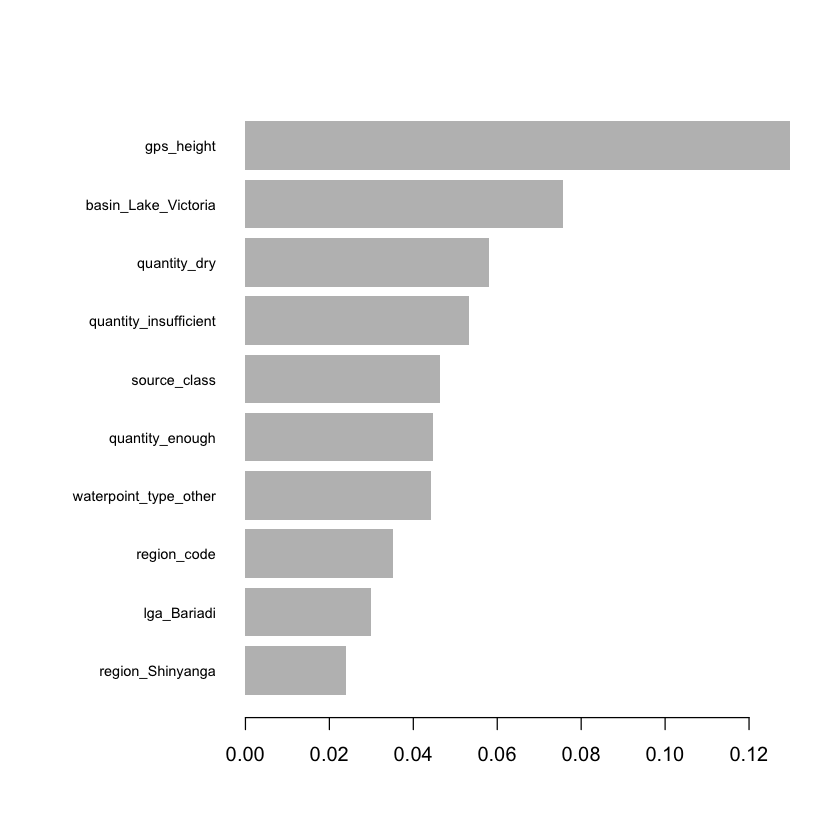

In [174]:
importanceRaw <- xgb.importance(feature_names = colnames(data_preproc), model = md, data = as.matrix(train_data[,-target_variable]),label=labels)
head(importanceRaw,100)
xgb.plot.importance(importance_matrix = importanceRaw[1:10])


In [184]:
pred <- predict(md, as.matrix(test_data[,-target_variable]),reshape = T)
head(pred)

ERROR: Error in predict.xgb.Booster(md, as.matrix(test_data[, -target_variable]), : Feature names stored in `object` and `newdata` are different!


In [176]:
predicted_labels <- factor(max.col(pred),levels=1:3)
real_labels <- factor(as.numeric(test_data[,target_variable]))
predicted_labels

[1] 3 2 3 2 1 3 3 1 3 2 1 1 1 2 1 1 3 1 2 2 1 1 3 1 2 1 2 1 1 3 1 2 3 2 1 1
   [37] 3 2 1 3 3 1 1 1 2 2 3 1 1 3 2 1 1 1 1 3 3 2 2 2 3 3 1 2 2 2 1 2 3 3 2 3
   [73] 1 1 1 3 3 3 1 2 1 2 1 3 1 2 2 1 1 3 1 1 1 3 1 3 3 2 2 2 3 3 1 1 2 2 1 3
  [109] 1 1 3 3 3 3 2 3 3 2 1 1 1 2 3 3 1 1 1 1 2 1 3 2 2 1 1 2 1 3 1 3 1 2 2 2
  [145] 3 2 1 2 2 1 3 1 3 2 1 3 2 1 2 3 2 3 2 2 3 2 3 1 1 2 3 1 3 1 2 1 3 1 3 1
  [181] 1 3 3 2 1 2 1 2 1 1 3 3 1 1 3 2 1 2 2 1 2 2 1 1 1 2 1 2 2 1 2 1 2 1 3 3
  [217] 3 3 2 2 3 3 3 1 1 2 1 1 1 3 1 3 1 2 1 2 2 1 1 2 3 3 1 3 2 1 3 3 1 1 1 1
  [253] 1 1 3 2 2 1 1 1 3 3 3 3 1 2 3 3 3 1 3 3 3 2 1 1 1 3 2 2 3 1 1 3 3 2 3 3
  [289] 1 2 1 3 1 1 1 2 1 3 1 1 3 1 3 3 2 3 1 2 1 2 1 2 2 2 3 2 2 2 1 3 1 1 2 3
  [325] 1 1 2 1 1 3 3 1 1 1 3 3 3 2 1 3 1 2 3 1 2 1 2 1 3 3 2 2 3 2 3 1 3 2 3 2
  [361] 1 1 1 3 3 2 1 1 2 2 3 2 3 1 1 1 3 3 1 2 1 2 2 3 2 3 1 2 1 3 3 2 2 1 1 3
  [397] 1 1 1 2 3 1 2 3 2 2 1 3 1 2 2 3 1 1 3 1 3 1 3 1 2 3 1 1 3 2 3 1 2 2 1 1
  [433] 1 1 2 3 1 2 1 1 1 1 3 1 2 2 2 3 3 1 2 1 1 2 1 3 1 3 1 2 1 3 3 2 1 1 2 3
  [469] 2 1 2 1 1 1 2 3 2 3 3 2 3 1 2 1 1 2 3 3 2 3 2 3 2 2 1 1 1 3 1 1 1 2 1 3
  [505] 2 3 3 3 2 3 3 3 1 1 3 2 2 3 3 3 1 1 3 1 1 3 1 3 3 2 2 1 1 1 3 3 1 2 2 1
  [541] 1 3 2 1 2 2 2 3 1 1 1 3 2 2 3 2 1 2 1 2 1 2 1 1 3 1 2 1 1 3 1 1 3 1 1 2
  [577] 3 3 3 1 3 2 1 1 1 1 2 1 1 1 3 2 2 1 1 1 1 2 1 3 1 1 1 2 3 3 3 3 1 2 1 3
  [613] 2 2 3 2 1 1 1 2 2 2 1 1 1 1 2 2 2 3 1 2 1 1 1 1 3 1 1 2 1 1 3 1 1 3 3 1
  [649] 2 3 2 2 1 1 2 2 2 2 3 1 3 1 2 1 2 1 3 1 2 1 1 3 1 2 2 1 2 2 1 2 3 3 1 1
  [685] 2 1 2 2 1 3 1 3 1 1 1 2 1 3 1 1 1 3 1 3 3 1 1 2 1 3 3 1 1 2 3 2 2 1 1 2
  [721] 2 3 1 2 2 1 1 3 2 2 2 2 1 1 3 1 3 1 2 3 2 1 1 3 2 1 2 1 1 3 1 1 1 3 3 3
  [757] 1 1 3 1 1 1 3 2 2 1 1 2 3 1 3 1 3 3 1 2 3 1 1 2 2 1 3 1 2 1 2 3 2 2 1 1
  [793] 1 3 3 1 1 1 2 1 1 1 2 3 3 3 2 1 1 2 2 2 3 2 3 3 2 2 3 1 3 1 1 3 2 3 2 3
  [829] 1 2 3 1 2 1 2 2 1 3 2 3 2 2 1 2 3 3 1 1 1 1 2 1 3 1 2 1 2 2 3 3 3 3 1 2
  [865] 2 2 2 1 1 1 3 3 1 2 1 1 2 1 3 3 2 1 3 1 2 2 1 2 1 2 1 1 1 2 3 2 3 1 3 1
  [901] 1 3 1 1 2 1 2 3 2 2 1 1 2 1 2 1 3 1 1 1 3 1 2 1 1 1 2 1 3 3 3 1 2 3 2 1
  [937] 1 1 3 1 2 1 2 1 1 3 1 1 1 1 1 3 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 3 2 2 1 1
  [973] 2 1 1 1 2 3 2 1 3 2 1 2 3 1 1 1 1 2 1 1 3 1 1 1 1 2 2 2 2 3 1 2 1 3 1 2
 [1009] 3 3 2 1 3 3 1 1 1 2 3 3 1 1 3 1 2 2 1 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 1 3
 [1045] 1 2 2 1 3 2 1 3 1 3 3 2 1 2 1 1 3 1 1 3 1 1 2 2 1 3 2 2 1 1 3 1 1 1 1 2
 [1081] 2 1 2 1 3 1 3 1 3 3 1 1 2 3 1 1 3 1 1 1 1 3 1 1 1 1 1 3 1 3 3 3 2 1 2 1
 [1117] 2 1 3 1 3 1 3 1 3 3 3 2 1 3 1 1 1 1 1 2 2 3 1 3 1 2 3 3 1 2 1 1 2 2 1 1
 [1153] 2 3 2 1 1 2 3 1 3 1 1 1 1 3 1 1 1 3 3 2 2 1 1 2 2 3 1 1 1 2 1 3 2 3 3 2
 [1189] 1 1 3 3 3 2 1 1 1 1 3 2 3 3 3 2 1 3 2 1 1 1 3 3 1 1 2 2 3 1 3 1 1 1 2 2
 [1225] 2 3 2 3 3 2 3 3 2 1 1 1 1 3 2 1 2 3 2 1 1 3 1 1 2 1 3 1 3 3 3 2 1 3 1 1
 [1261] 2 3 2 1 2 2 1 1 3 2 1 1 1 1 2 1 2 2 3 2 2 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1
 [1297] 2 1 1 3 2 1 1 3 2 1 1 3 1 1 2 2 3 1 1 3 2 1 1 1 1 1 2 1 1 2 1 2 3 1 1 3
 [1333] 3 2 2 1 3 3 2 3 3 3 3 1 1 2 3 1 3 1 1 3 2 1 1 2 2 3 1 1 3 1 2 2 3 3 3 3
 [1369] 2 1 1 2 1 3 2 2 2 2 1 3 3 2 3 2 1 1 1 3 1 1 1 1 1 3 1 3 1 3 1 2 2 1 1 1
 [1405] 2 3 1 2 1 3 2 2 3 3 3 3 2 1 3 1 3 3 3 2 3 3 1 1 1 2 2 1 2 1 3 3 2 2 2 1
 [1441] 1 3 2 1 2 1 1 3 3 2 1 1 2 2 2 2 1 1 3 2 3 2 1 2 3 2 1 1 1 3 1 1 1 1 3 2
 [1477] 1 3 2 1 1 3 1 1 1 1 1 1 2 3 1 2 1 1 1 3 3 3 2 3 1 3 2 2 2 2 1 2 3 1 1 3
 [1513] 3 1 2 2 1 2 1 2 2 1 1 3 2 3 2 2 1 1 1 1 3 2 1 1 3 1 1 2 1 1 3 3 2 2 1 2
 [1549] 3 2 2 1 1 2 2 2 1 1 2 2 2 1 1 1 3 1 1 3 2 1 1 3 2 2 1 1 3 2 1 1 2 2 3 3
 [1585] 1 2 2 2 1 1 2 1 2 1 2 1 3 2 3 1 2 1 2 2 2 1 2 3 2 2 1 3 1 2 2 2 2 2 2 2
 [1621] 1 1 2 3 3 3 1 3 3 2 1 2 1 1 3 2 3 3 1 2 3 3 2 3 2 1 2 1 2 2 3 3 1 1 1 2
 [1657] 1 1 1 1 1 2 2 3 3 1 1 2 1 1 2 1 1 2 2 1 3 2 1 2 1 1 1 1 1 3 1 1 2 3 2 2
 [1693] 1 1 1 3 1 1 2 2 1 2 1 1 1 2 3 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 3 1 3 3 2 3
 [1729] 2 3 1 2 3 3 2 2 1 1 3 1 2 1 1 2 2 3 1 3 2 2 2 3 1 1 1 2 3 3 3 1 1 1 3 3
 [1765] 2 1 1 1 3 3 2 1 3 3 1 3 1 1 2 2 2 3 1 1 2 1 3 2 1 1 2 1 3 1 3 3 1 3 1 1
 [18

In [199]:
caret::confusionMatrix(real_labels,predicted_labels)

Confusion Matrix and Statistics

          Reference
Prediction     1     2     3
         1 12435   769  1317
         2  1523  1800   497
         3  2365   334  7412

Overall Statistics
                                          
               Accuracy : 0.7608          
                 95% CI : (0.7558, 0.7658)
    No Information Rate : 0.5737          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5864          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7618  0.62005   0.8034
Specificity            0.8280  0.92094   0.8596
Pos Pred Value         0.8563  0.47120   0.7331
Neg Pred Value         0.7209  0.95522   0.9011
Prevalence             0.5737  0.10203   0.3243
Detection Rate         0.4371  0.06326   0.2605
Detection Prevalence   0.5104  0.13426   0.3554
Balanced Accuracy

In [178]:
best_param

$objective
[1] "multi:softprob"

$eval_metric
[1] "merror"

$num_class
[1] 3

$max_depth
[1] 29

$eta
[1] 0.224618

$gamma
[1] 0.04768138

$subsample
[1] 0.7341036

$colsample_bytree
[1] 0.5446378

$min_child_weight
[1] 14

$max_delta_step
[1] 3

In [179]:
pred <- predict(md, as.matrix(test_preproc),reshape = T)
head(pred)
pred <- factor(max.col(pred),levels=1:3)
pred <- ifelse(pred == 1,"functional",ifelse(pred == 2, "functional needs repair", "non functional"))
barplot(table(pred))

ERROR: Error in predict.xgb.Booster(md, as.matrix(test_preproc), reshape = T): Feature names stored in `object` and `newdata` are different!


In [77]:
res <- cbind("id"=eval_data$id,"status_group"=as.character(pred))
head(res)

id,status_group
50785,non functional
51630,non functional
17168,non functional
45559,non functional
49871,functional
52449,functional


In [78]:
write.csv(res,"submission.csv",row.names=FALSE)

# Conclusions